In [1]:
#hellooooo??
# G, i, j, FUNCTIONS:

def length_shared_path(G, i, k, j): #computes the length of the shared path between the vertices i and j and the vertices k and j.
    return ((1/2) * (G.distance(i, j) + G.distance(k, j) - G.distance(i,k)))

def hitting_time(G, i, j): #computes the hitting time between two vertices i and j in graph G.
    total_time = 0
    for k in G.vertices(): # sum over all k
        one_iteration = length_shared_path(G, i, k, j) * G.degree(k) #multiply the length times the degree for one k
        total_time = total_time + one_iteration #add it to total
    return total_time

def hitting_time_matrix(string): #turns the hitting times into a matrix
    G = Graph(string)
    n = G.order()
    matrix = zero_matrix(n,n) #create a zero n by n matrix where n = number of vertices.
    for i in G.vertices(): #for each vertex
        for j in G.vertices(): #find the hitting time to each other vertex
            matrix[i,j]=hitting_time(G,i,j) #put that into a matrix
            
    return matrix

def stationary_distribution(G, i): #finds the stationary distribution of a specific vertex i in a graph G
    pi_i = G.degree(i) / (2 * G.size()) #equation for pi_i
    return pi_i

from sage.graphs.trees import TreeIterator
def tree_generator(n, d): #generates all trees on n vertices with diameter d
    trees = [] #creates an empty list
    for t in TreeIterator(n): #for each tree in all trees on n vertices
        if t.diameter() == d: #check if the diameter is equal to d
            t_string = t.graph6_string()
            trees.append(t_string) #if so, add it to our list
    return trees #return the list of trees on n vertices with diameter d

def max_pessimal(G): #finds the max pessimal value for a graph G
    matrix = hitting_time_matrix(G)
    pessimal_value = matrix.numpy().max() #finds the maximum value in the matrix of hitting times
    return pessimal_value

def min_pessimal(G): #finds the min pessimal value for a graph G
    matrix = hitting_time_matrix(G).transpose()
    list_of_pessimals = [] #placeholder empty list
    for row in matrix: #for each vertex
        pessimal = 0 #start with 0 as the pessimal time (placeholder)
        for i in row: #iterate over all hitting times
            if i >= pessimal: #find the biggest hitting time
                pessimal = i #this is the new pessimal, do it again
        list_of_pessimals.append(pessimal) #add each vertex's pessimal to a list
    min_pessimal_value = min(list_of_pessimals) #find the minimum pessimal
    return min_pessimal_value

def access_time(G, j): #given a graph and a vertex j, finds the access time to j
    acc = 0 #placeholder
    for i in G.vertices(): #for each vertex in G
        pi_i = stationary_distribution(G, i) 
        H_i_j = hitting_time(G, i, j)
        acc_i = pi_i * H_i_j #find the time to j
        acc = acc + acc_i #add them all together to get the access time
    return acc
        
#perhaps... pass in a hitting time matrix to access_time so that it doesn't do hitting_time a bunch of times
    
def max_access_time(G): #finds the max access value across all vertices in a graph G
    max_acc = 0 #placeholder
    for j in G.vertices(): # for each vertex in G
        new_max_acc = access_time(G,j) #find the access time to j
        if new_max_acc >= max_acc: #compare to previous access time
            max_acc = new_max_acc #if bigger, make it new max access time
    return max_acc #return max access time

def min_access_time(G): #finds the minimum access time of a graph G
#     start_vertex = G.random_vertex()
#     min_acc = access_time(G, start_vertex) #randomly find an access time to be the first min
    min_acc = G.order()^2 #start with a real big min time (by "the path theorem")
    for j in G.vertices(): #for each vertex in the graph
        new_min_acc = access_time(G,j) #compare the access time to the min access time
        if new_min_acc <= min_acc: #if it's less,
            min_acc = new_min_acc #make that the new min access time
    return min_acc

def commute_time(G, i, j): #finds the commute time between two vertices i and j in a graph G
    ij = hitting_time(G, i, j) #H_{i,j}
    ji = hitting_time(G, j, i) #H_{j,i}
    commute = ij+ji #equation for commute time
    return commute

def commute_time_matrix(string): #turns the commute times into a matrix
    G = Graph(string)
    n = G.order()
    matrix = zero_matrix(n,n) #create a zero n by n matrix where n = number of vertices.
    for i in G.vertices(): #for each vertex
        for j in range(i): #find the commute time to each other vertex
            entry = commute_time(G,i,j) #calculate commute time
            matrix[i,j] = entry #put it into the [i,j] spot
            matrix[j,i] = entry #put it into the [j,i] spot
    return matrix

def max_commute_time(G): #finds the max commute time for a graph G
    matrix = commute_time_matrix(G)
    max_commute_value = matrix.numpy().max() #finds the maximum value in the matrix of commute times
    return max_commute_value

def min_commute_time(G): #finds the min commute time for a graph G
    min_commute=commute_time(G,0,1)
    for i in G.vertices(): #for all pairs of vertices in the graph
        for j in G.vertices():
            if i == j: #don't do anYthing if they're the same vertex,
                pass
            else: #otherwise
                new_min_commute = commute_time(G,i, j) #find the commute time between the two vertices
                if new_min_commute <= min_commute: #if the new commute time is smaller than the minimum
                    min_commute = new_min_commute #make that the new minimum and repeat
    return min_commute

In [9]:
#(n,d) FUNCTIONS:
def max_max_pessimal(n, d): #THANKS ARI
    max_max_pess = 0
    trees = tree_generator(n, d)
    for t in trees:
        new_pess = max_pessimal(t)
        Graph(t).show()
        print(t, new_pess)
        if new_pess >= max_max_pess:
            max_max_pess = new_pess
    return max_max_pess

def max_min_pessimal(n, d):
    max_min_pess = 0
    trees = tree_generator(n, d)
    for t in trees:
        new_pess = min_pessimal(t)
        Graph(t).show()
        print(t, new_pess)
        if new_pess >= max_min_pess:
            max_min_pess = new_pess
    return max_min_pess

def min_min_pessimal(n, d):
#     min_min_pess = (n-1)^2
    all_min = []
    trees = tree_generator(n, d)
    for t in trees:
        new_pess = min_pessimal(t)
        Graph(t).show()
        print(t, new_pess)
        all_min.append(new_pess)
#         if new_pess <= min_min_pess:
#             min_min_pess = new_pess
    return all_min

def min_max_pessimal(n, d): #THANKS ARI
    min_max_pess = (n-1)^2
    trees = tree_generator(n, d)
    for t in trees:
        new_pess = max_pessimal(t)
        Graph(t).show()
        print(t, new_pess)
        if new_pess <= min_max_pess:
            min_max_pess = new_pess
    return min_max_pess

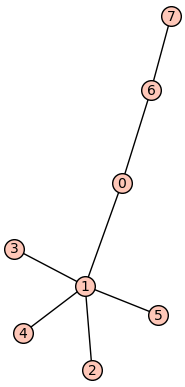

GiPC?C 9


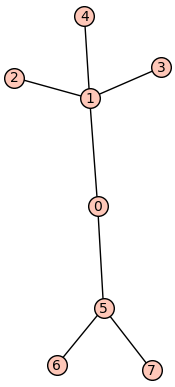

GiQ?GG 8


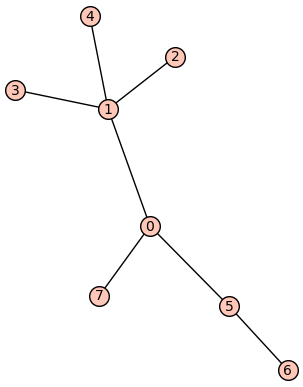

GiQ?K? 8


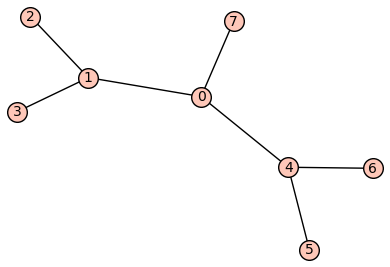

Gi_GS? 6


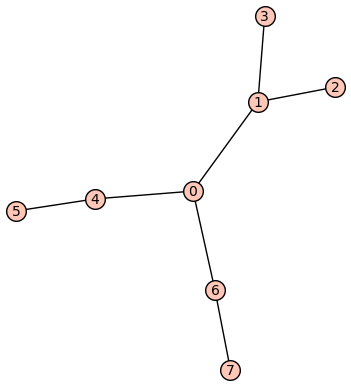

Gi_K?C 6


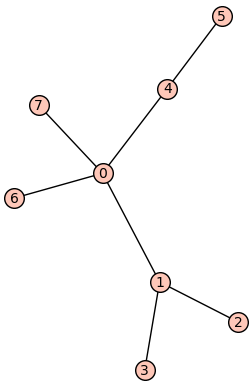

Gi_KC? 6


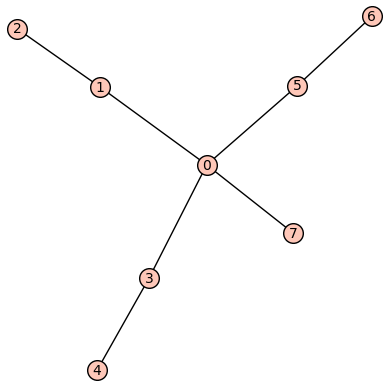

GkE?K? 4


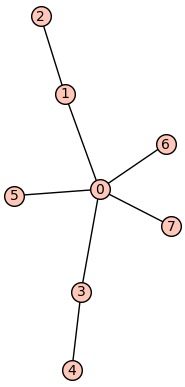

GkECC? 4


[9, 8, 8, 6, 6, 6, 4, 4]

In [10]:
min_min_pessimal(8,4)

In [ ]:
# tree constructors
def double_broom_constructor(d, left, right):
    handle = graphs.PathGraph(d+1)
    for i in range(left-1):
        handle.add_edge(1, i+d+1)
    for j in range(right-1):
        handle.add_edge(d-1, j+left+d)
    broom_string = handle.graph6_string()
    double_broom = Graph(broom_string)
    return double_broom

def lever_maker(diameter, vertex, leaves):
        path = graphs.PathGraph(diameter+1)
        for i in range(leaves):
            path.add_edge(vertex, d+i+leaves)
        lever_string = path.graph6_string()
        lever = Graph(lever_string)
        return lever

## 6/23:

### formula for min pess time on a lever graph

In [28]:
def min_pess_time_lever_graph(d, i, l):
    list_of_pess_times = []
    for j in range(1, d):
        if j < i:
            H_0 = j^2
            H_d = (d-j)^2 + (2*l*(i-j))
        elif j == i:
            H_0 = i^2
            H_d = (d-j)^2
        else:
            H_0 = j^2 + 2*l*(j-i)
            H_d = (d-j)^2
        j_pess = max(H_0, H_d)
        list_of_pess_times.append(j_pess)
    min_pess = min(list_of_pess_times)
    vertex = list_of_pess_times.index(min_pess)
    return ("the pessimal time is", min_pess, "which occures when j =", vertex+1)

In [32]:
min_pess_time_lever_graph(7,5,10)

('the pessimal time is', 25, 'which occures when j =', 5)

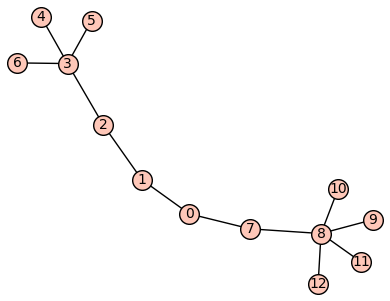

LhCOc?@?G@?C?G 28


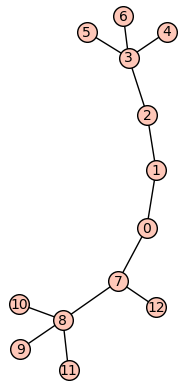

LhCOc?@?G@?C?O 28


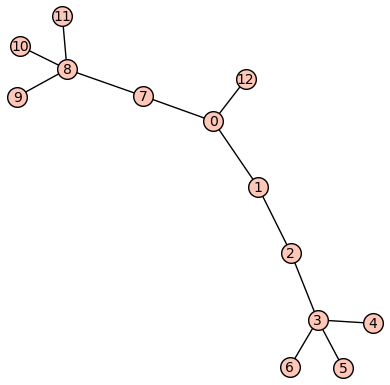

LhCOc?@?G@?C_? 28


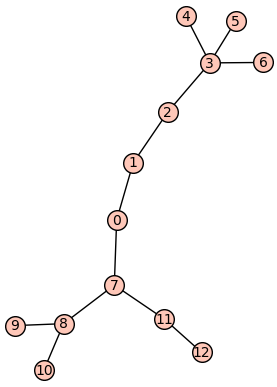

LhCOc?@?G@?G?@ 28


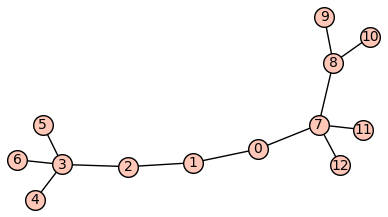

LhCOc?@?G@?G?O 28


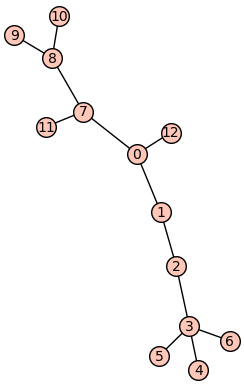

LhCOc?@?G@?G_? 28


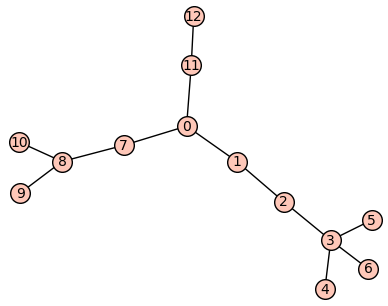

LhCOc?@?G@O??@ 26


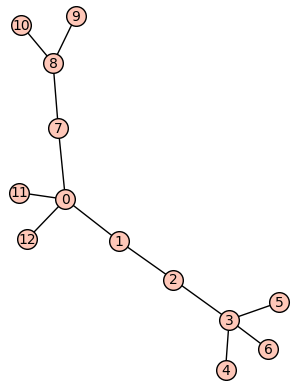

LhCOc?@?G@O?_? 26


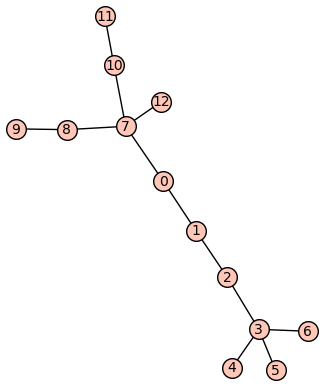

LhCOc?@?GA?@?O 28


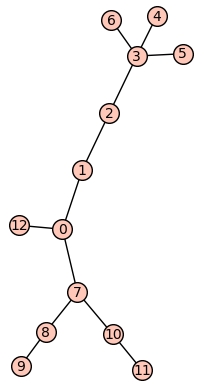

LhCOc?@?GA?@_? 26


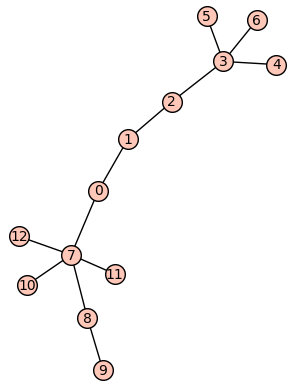

LhCOc?@?GA?G?O 28


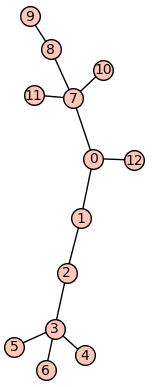

LhCOc?@?GA?G_? 26


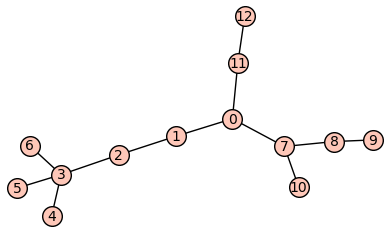

LhCOc?@?GAO??@ 24


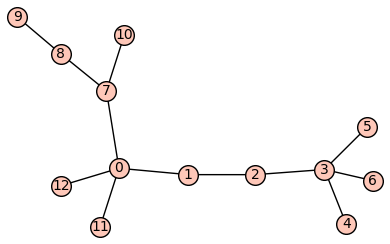

LhCOc?@?GAO?_? 24


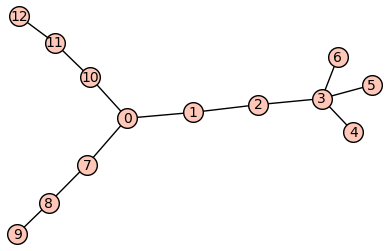

LhCOc?@?K??@?@ 22


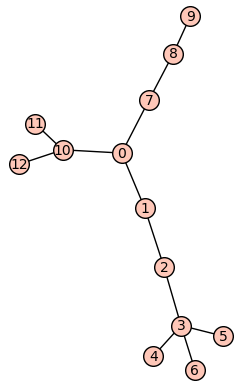

LhCOc?@?K??@?A 22


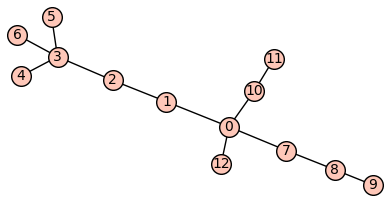

LhCOc?@?K??@_? 22


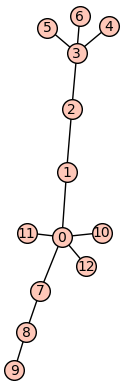

LhCOc?@?K?O?_? 22


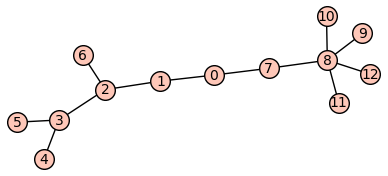

LhCPC?@?G@?C?G 26


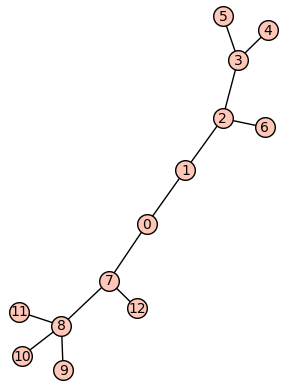

LhCPC?@?G@?C?O 26


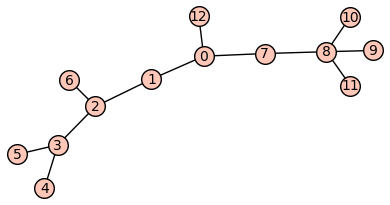

LhCPC?@?G@?C_? 26


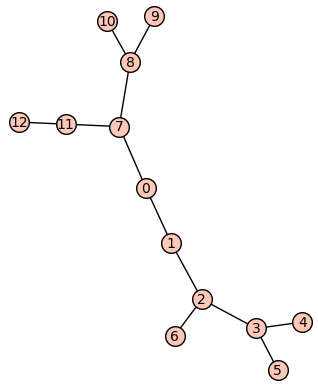

LhCPC?@?G@?G?@ 26


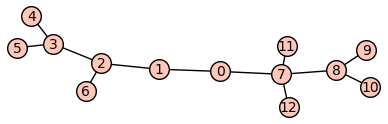

LhCPC?@?G@?G?O 26


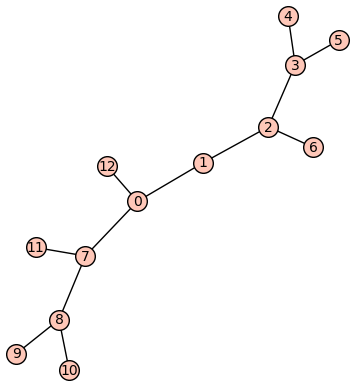

LhCPC?@?G@?G_? 26


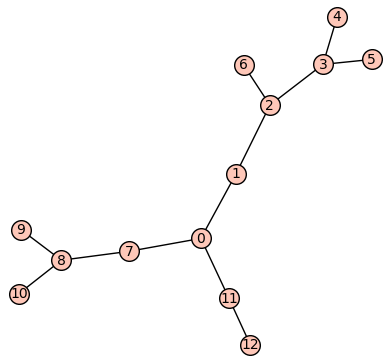

LhCPC?@?G@O??@ 26


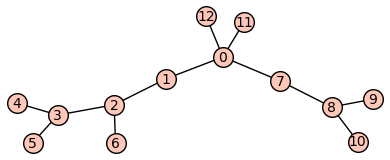

LhCPC?@?G@O?_? 26


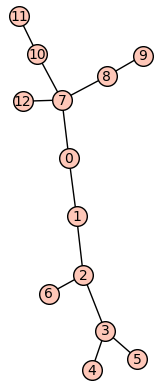

LhCPC?@?GA?@?O 26


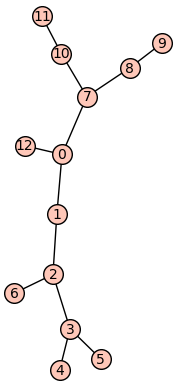

LhCPC?@?GA?@_? 26


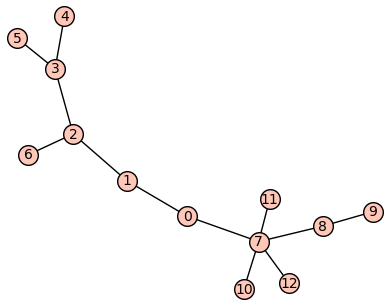

LhCPC?@?GA?G?O 26


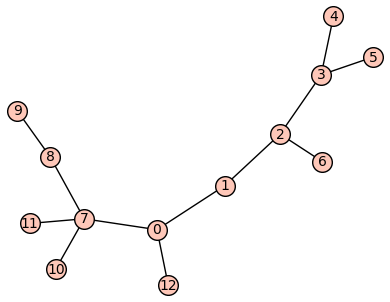

LhCPC?@?GA?G_? 26


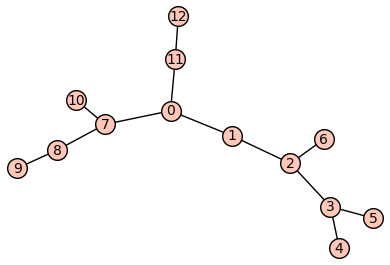

LhCPC?@?GAO??@ 24


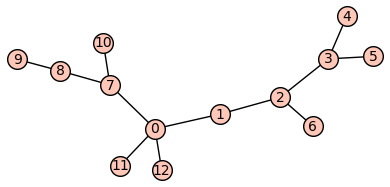

LhCPC?@?GAO?_? 24


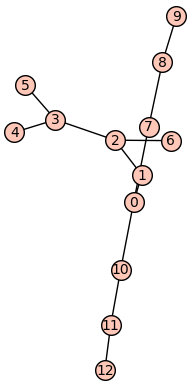

LhCPC?@?K??@?@ 22


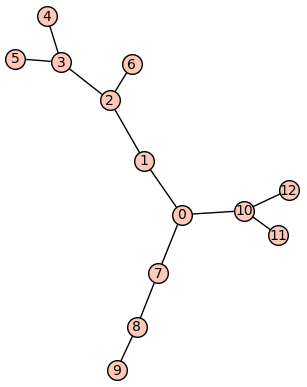

LhCPC?@?K??@?A 22


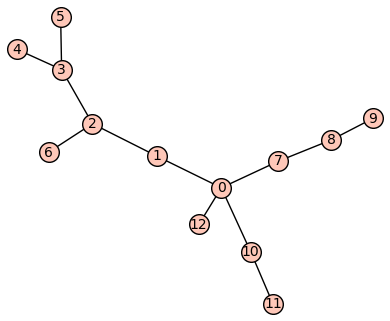

LhCPC?@?K??@_? 22


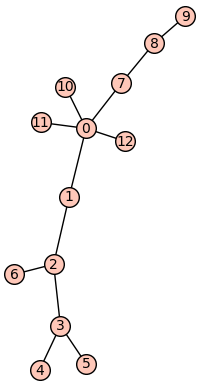

LhCPC?@?K?O?_? 22


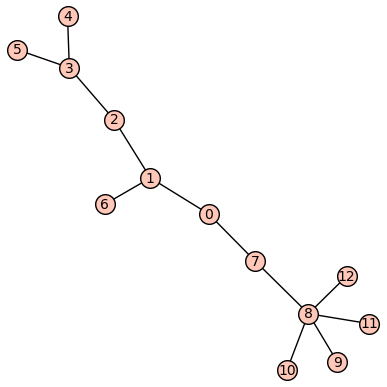

LhCQC?@?G@?C?G 24


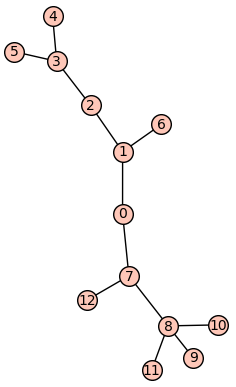

LhCQC?@?G@?C?O 24


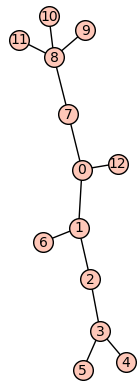

LhCQC?@?G@?C_? 24


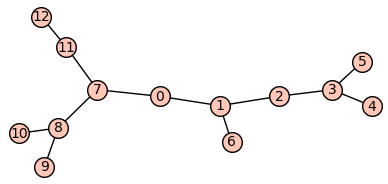

LhCQC?@?G@?G?@ 24


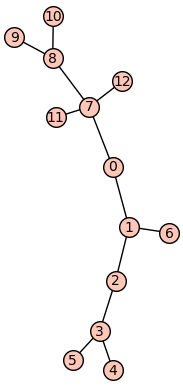

LhCQC?@?G@?G?O 24


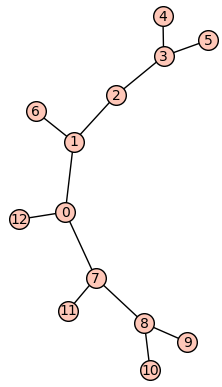

LhCQC?@?G@?G_? 24


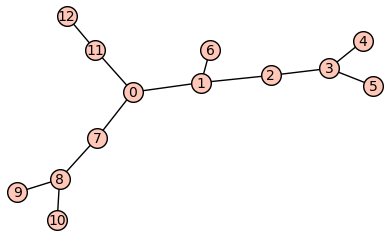

LhCQC?@?G@O??@ 24


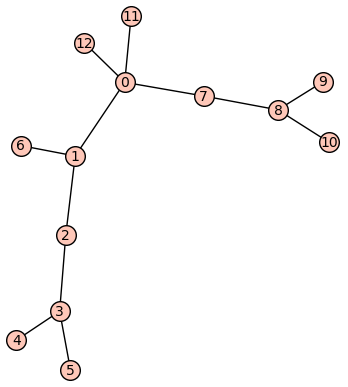

LhCQC?@?G@O?_? 24


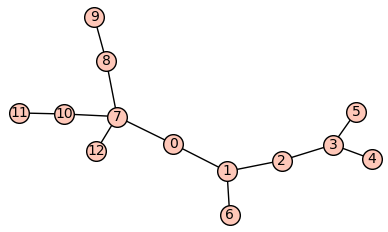

LhCQC?@?GA?@?O 24


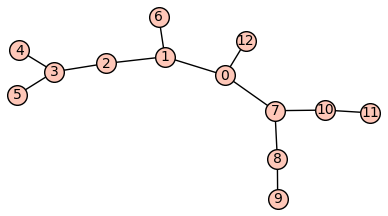

LhCQC?@?GA?@_? 24


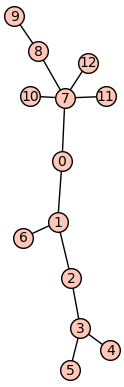

LhCQC?@?GA?G?O 24


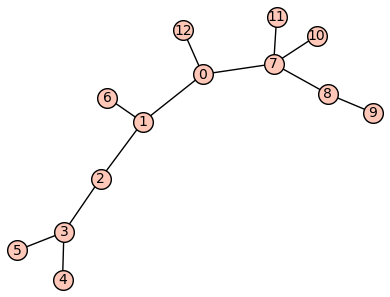

LhCQC?@?GA?G_? 24


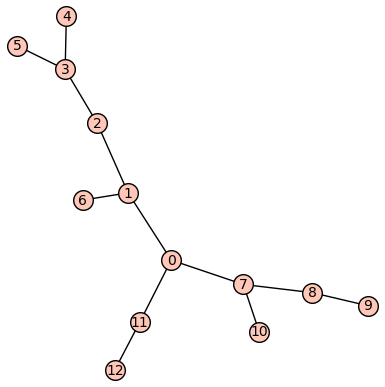

LhCQC?@?GAO??@ 24


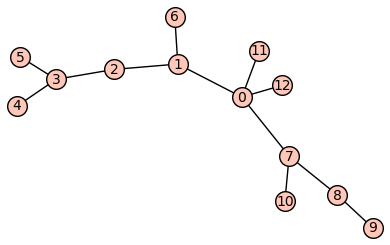

LhCQC?@?GAO?_? 24


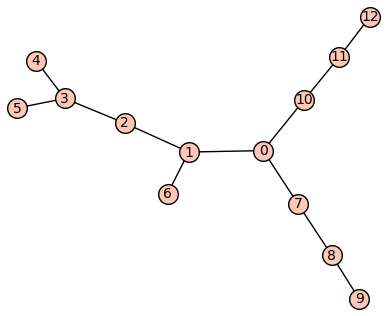

LhCQC?@?K??@?@ 22


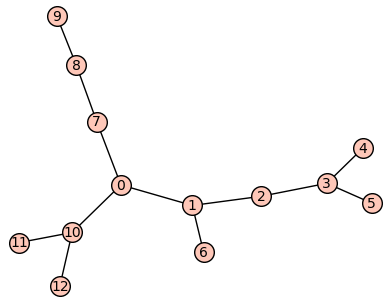

LhCQC?@?K??@?A 22


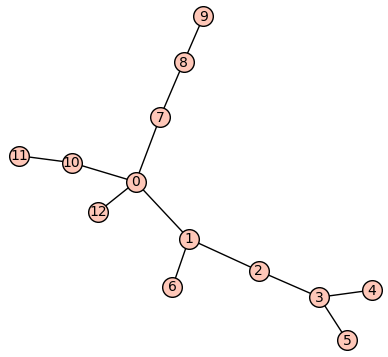

LhCQC?@?K??@_? 22


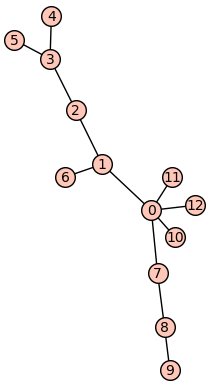

LhCQC?@?K?O?_? 22


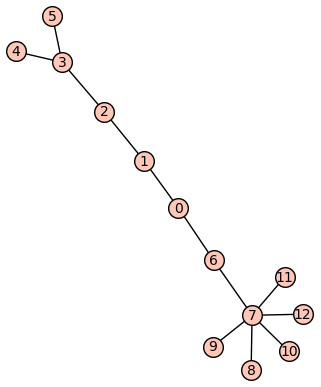

LhCS?C@?OA?G?O 25


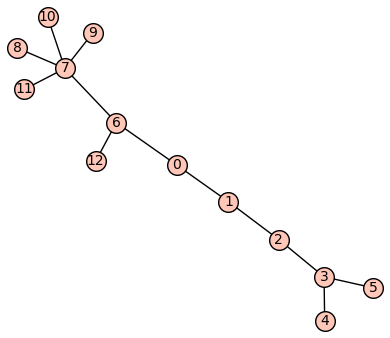

LhCS?C@?OA?G?_ 23


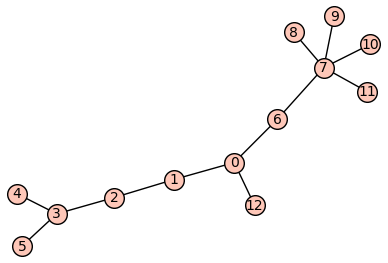

LhCS?C@?OA?G_? 22


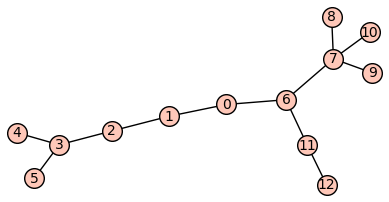

LhCS?C@?OA?O?@ 22


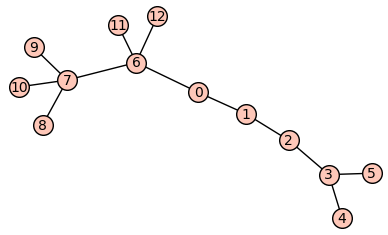

LhCS?C@?OA?O?_ 22


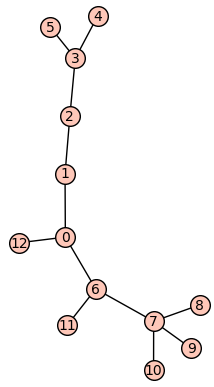

LhCS?C@?OA?O_? 22


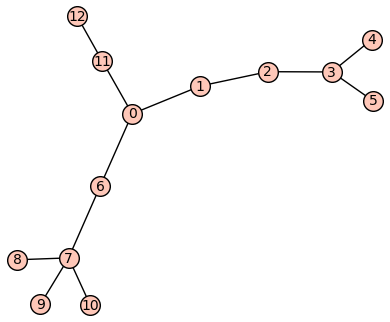

LhCS?C@?OAO??@ 22


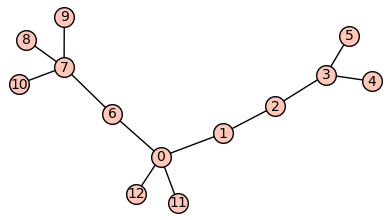

LhCS?C@?OAO?_? 22


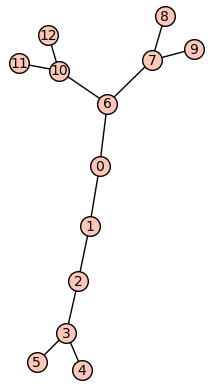

LhCS?C@?OC?@?A 22


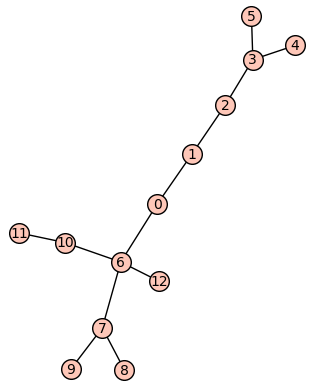

LhCS?C@?OC?@?_ 22


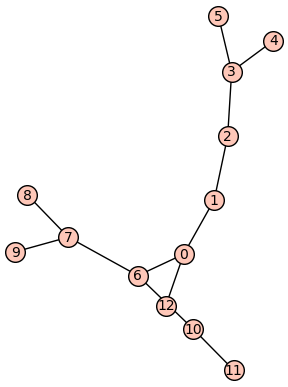

LhCS?C@?OC?@_? 22


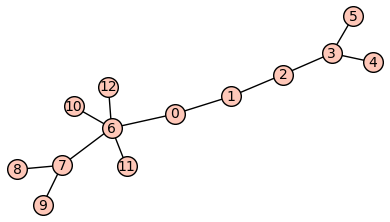

LhCS?C@?OC?O?_ 22


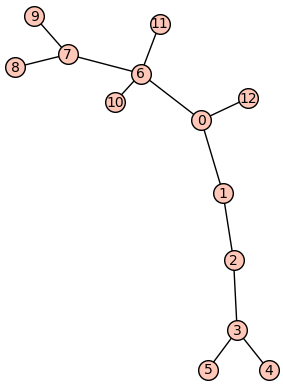

LhCS?C@?OC?O_? 22


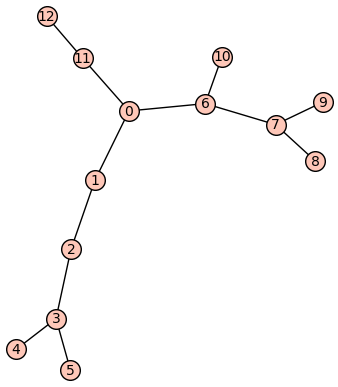

LhCS?C@?OCO??@ 22


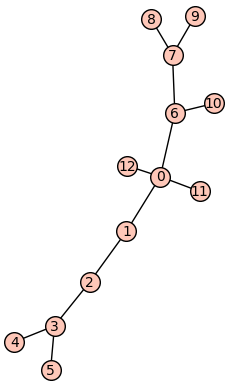

LhCS?C@?OCO?_? 22


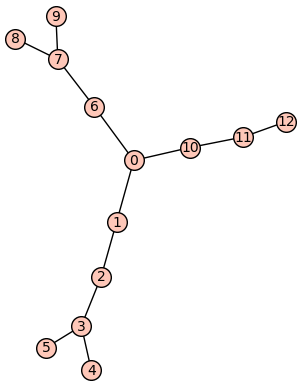

LhCS?C@?S??@?@ 22


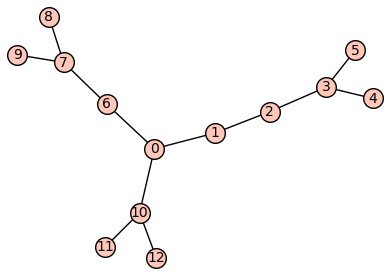

LhCS?C@?S??@?A 22


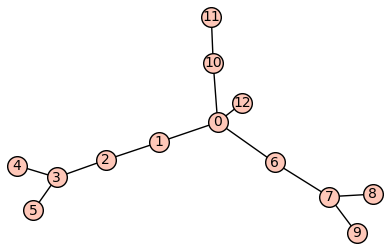

LhCS?C@?S??@_? 22


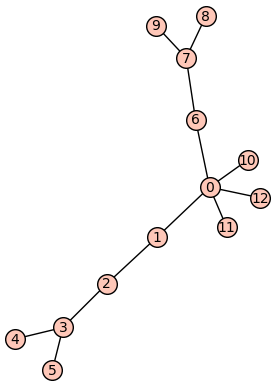

LhCS?C@?S?O?_? 22


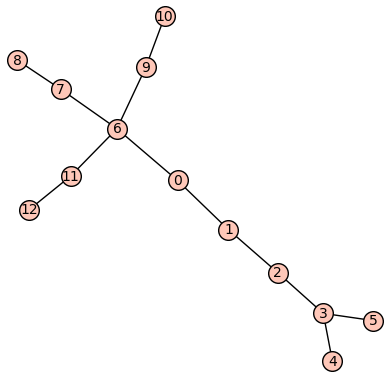

LhCS?C@?_?_O?@ 22


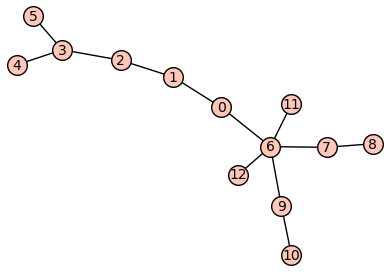

LhCS?C@?_?_O?_ 22


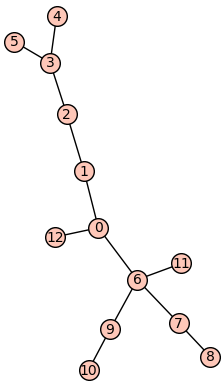

LhCS?C@?_?_O_? 22


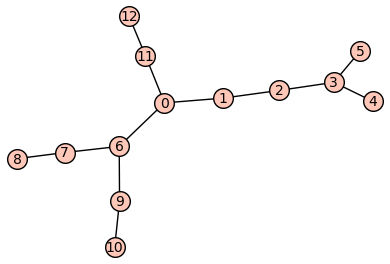

LhCS?C@?_?o??@ 22


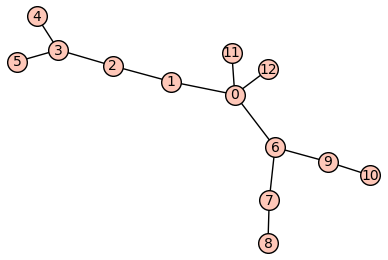

LhCS?C@?_?o?_? 22


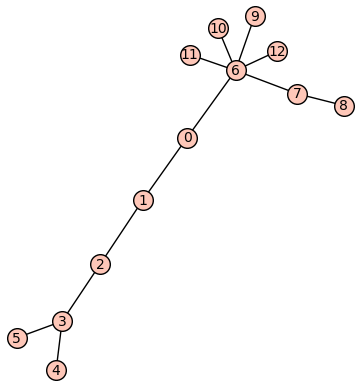

LhCS?C@?_C?O?_ 22


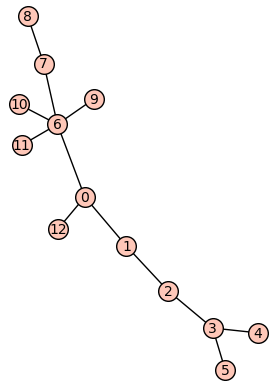

LhCS?C@?_C?O_? 22


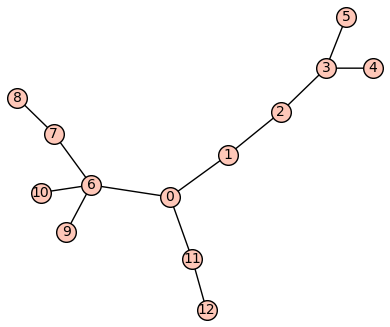

LhCS?C@?_CO??@ 22


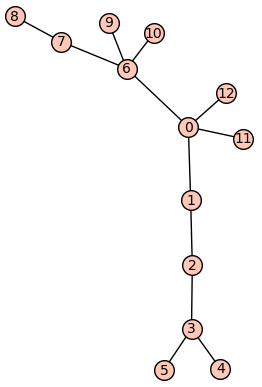

LhCS?C@?_CO?_? 22


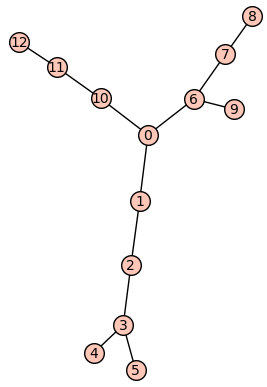

LhCS?C@?c??@?@ 22


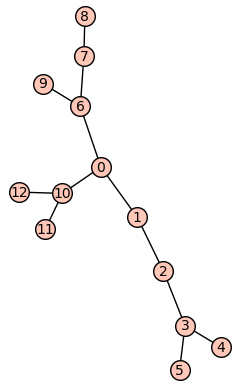

LhCS?C@?c??@?A 22


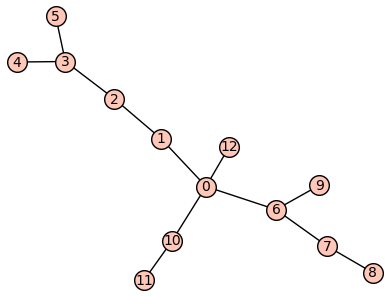

LhCS?C@?c??@_? 22


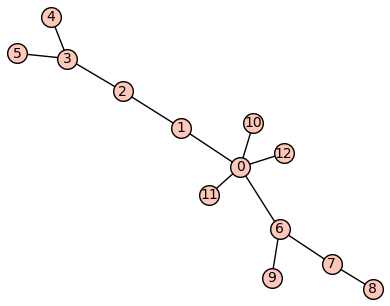

LhCS?C@?c?O?_? 22


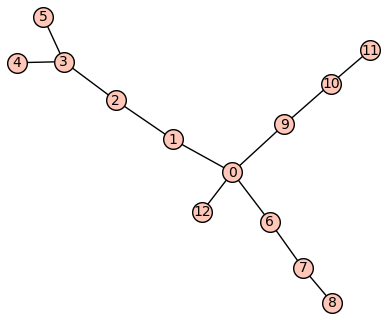

LhCS?C@_??_@_? 22


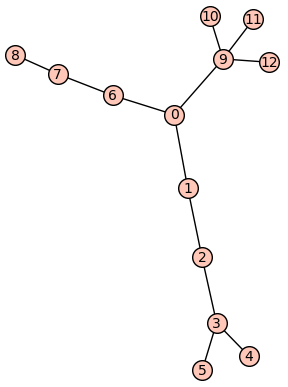

LhCS?C@_??_A?C 22


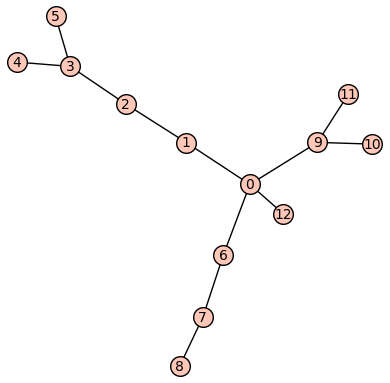

LhCS?C@_??_A_? 22


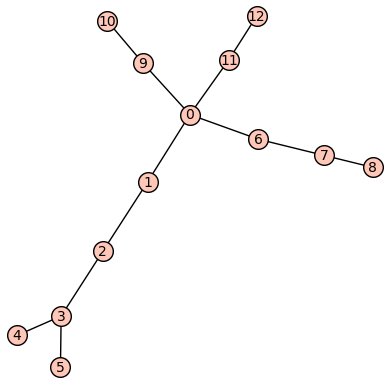

LhCS?C@_??o??@ 22


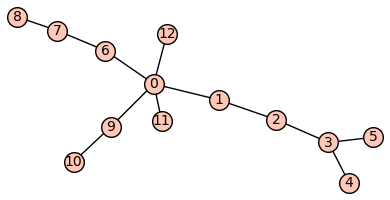

LhCS?C@_??o?_? 22


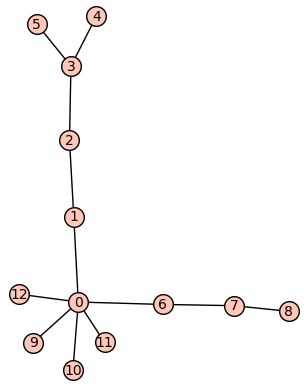

LhCS?C@_C?O?_? 22


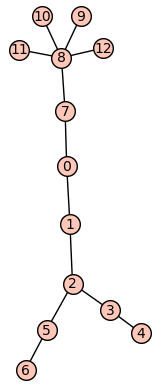

LhC_K?@?G@?C?G 24


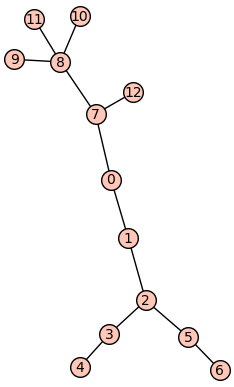

LhC_K?@?G@?C?O 24


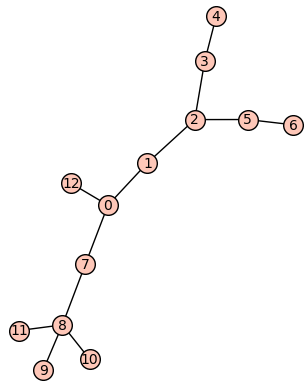

LhC_K?@?G@?C_? 24


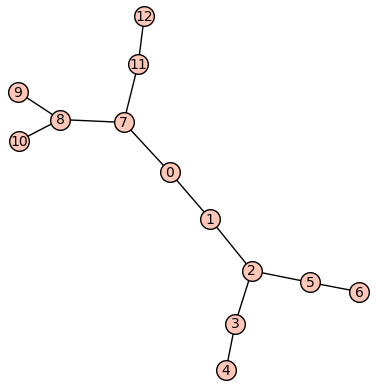

LhC_K?@?G@?G?@ 24


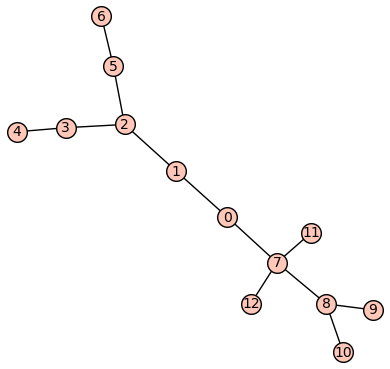

LhC_K?@?G@?G?O 24


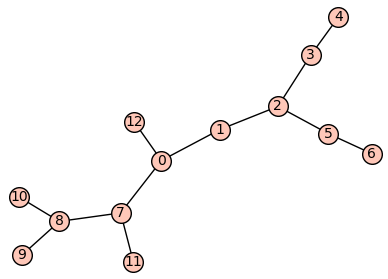

LhC_K?@?G@?G_? 24


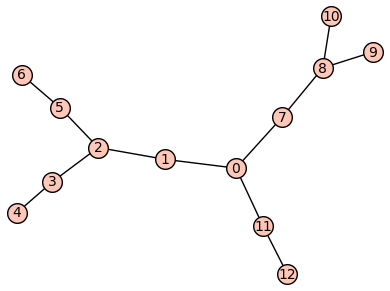

LhC_K?@?G@O??@ 24


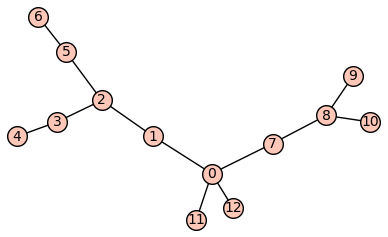

LhC_K?@?G@O?_? 24


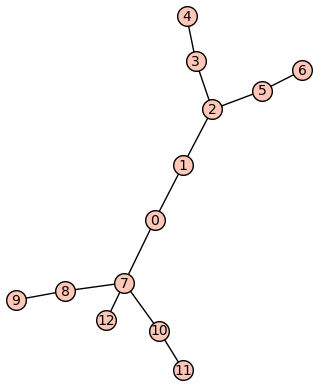

LhC_K?@?GA?@?O 24


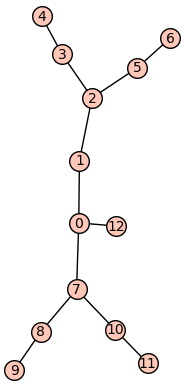

LhC_K?@?GA?@_? 24


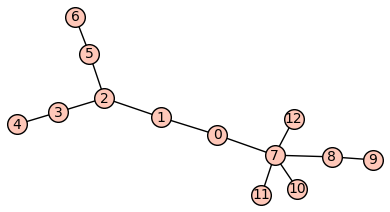

LhC_K?@?GA?G?O 24


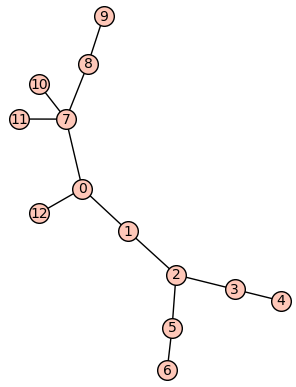

LhC_K?@?GA?G_? 24


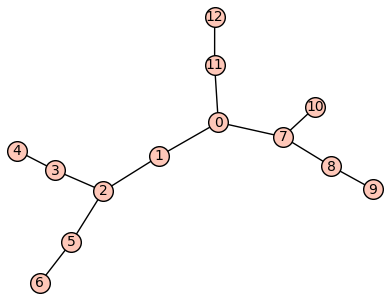

LhC_K?@?GAO??@ 24


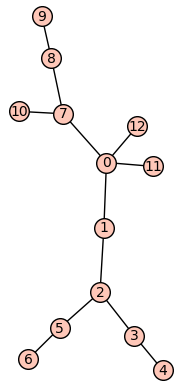

LhC_K?@?GAO?_? 24


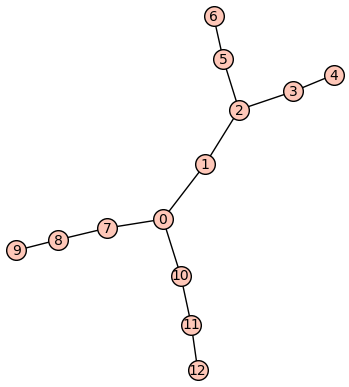

LhC_K?@?K??@?@ 22


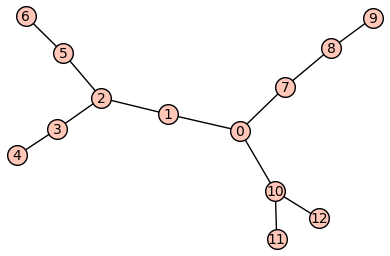

LhC_K?@?K??@?A 22


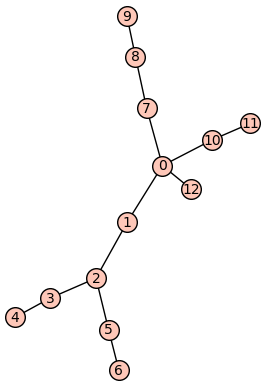

LhC_K?@?K??@_? 22


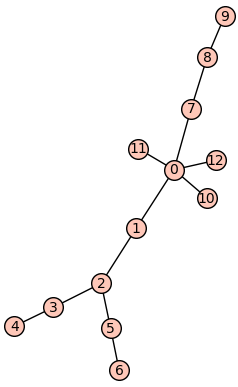

LhC_K?@?K?O?_? 22


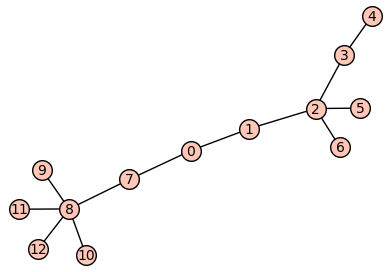

LhC`C?@?G@?C?G 24


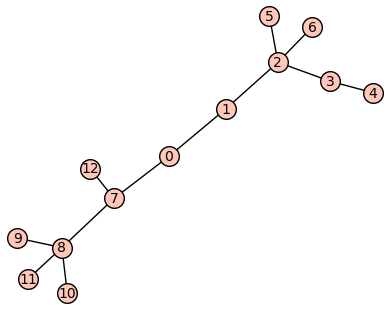

LhC`C?@?G@?C?O 24


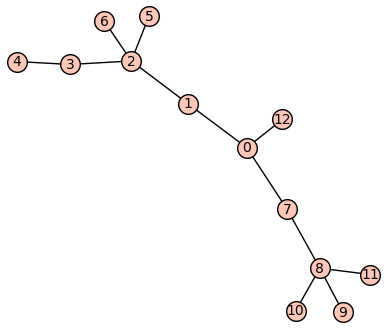

LhC`C?@?G@?C_? 24


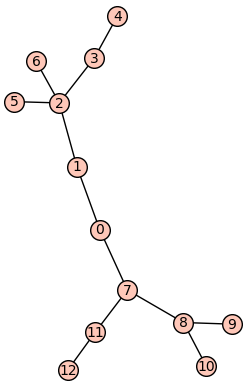

LhC`C?@?G@?G?@ 24


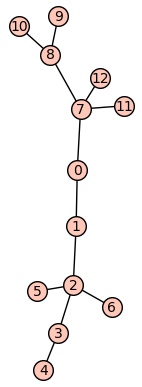

LhC`C?@?G@?G?O 24


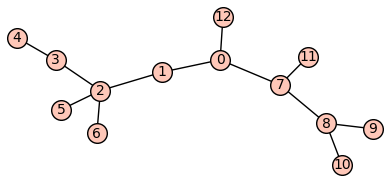

LhC`C?@?G@?G_? 24


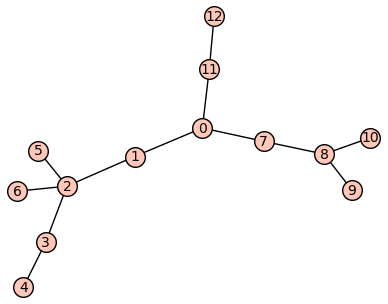

LhC`C?@?G@O??@ 24


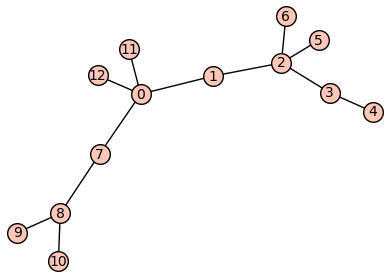

LhC`C?@?G@O?_? 24


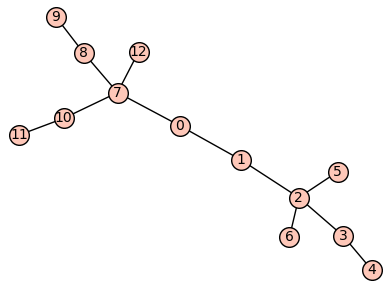

LhC`C?@?GA?@?O 24


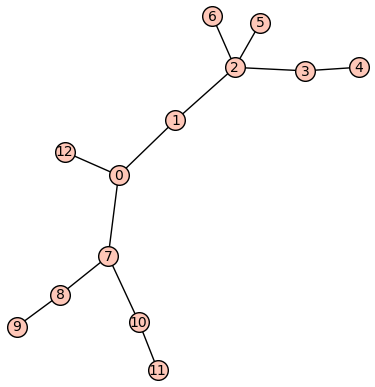

LhC`C?@?GA?@_? 24


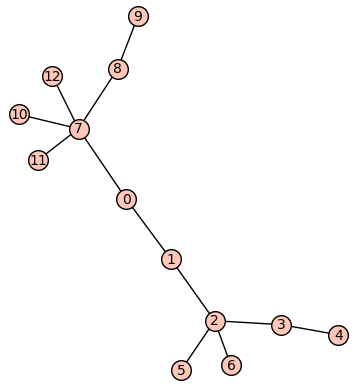

LhC`C?@?GA?G?O 24


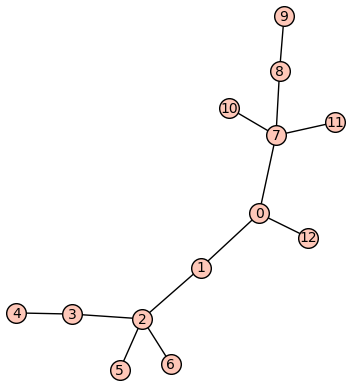

LhC`C?@?GA?G_? 24


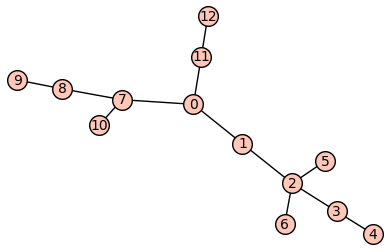

LhC`C?@?GAO??@ 24


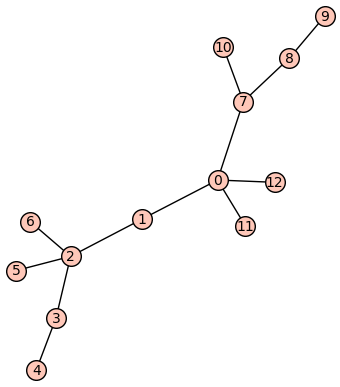

LhC`C?@?GAO?_? 24


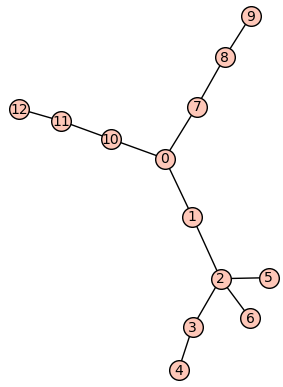

LhC`C?@?K??@?@ 22


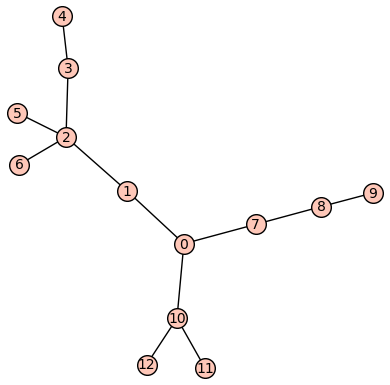

LhC`C?@?K??@?A 22


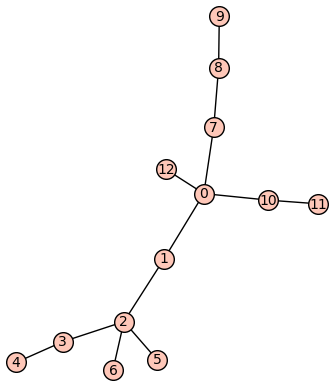

LhC`C?@?K??@_? 22


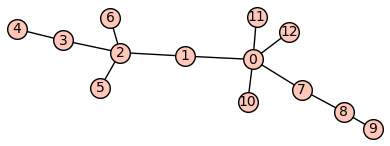

LhC`C?@?K?O?_? 22


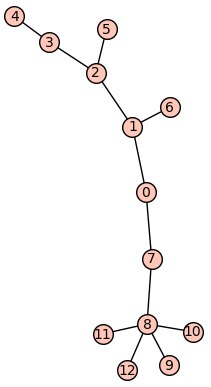

LhCaC?@?G@?C?G 22


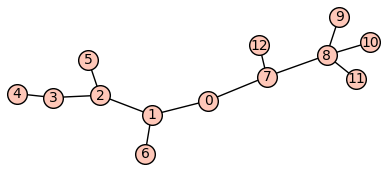

LhCaC?@?G@?C?O 22


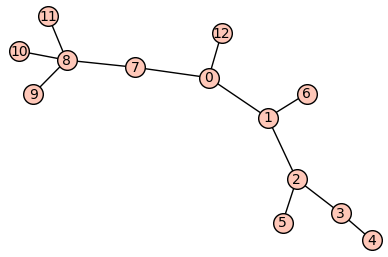

LhCaC?@?G@?C_? 22


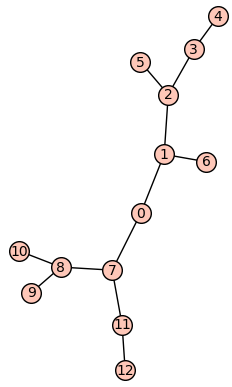

LhCaC?@?G@?G?@ 22


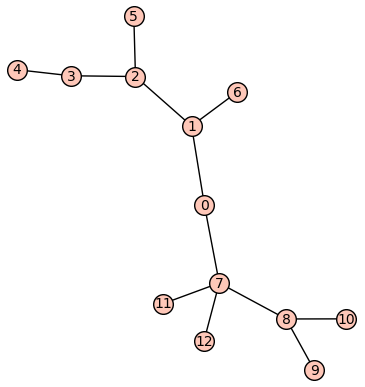

LhCaC?@?G@?G?O 22


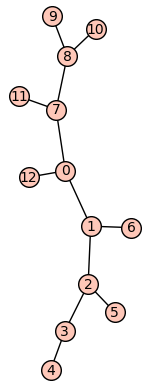

LhCaC?@?G@?G_? 22


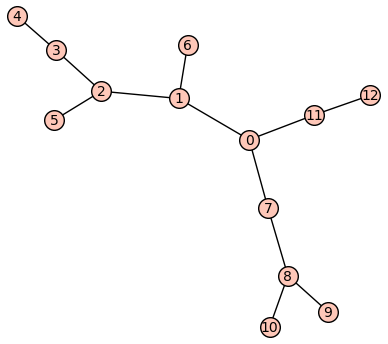

LhCaC?@?G@O??@ 22


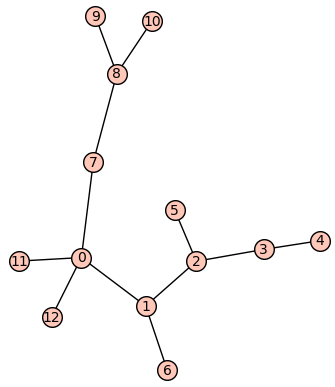

LhCaC?@?G@O?_? 22


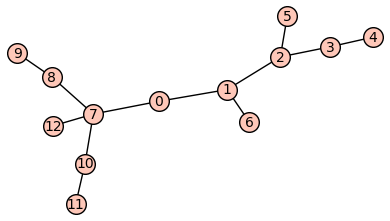

LhCaC?@?GA?@?O 22


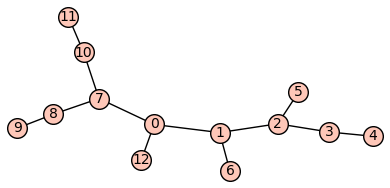

LhCaC?@?GA?@_? 22


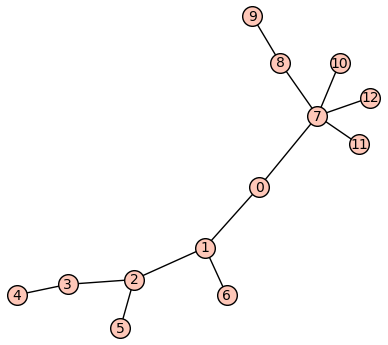

LhCaC?@?GA?G?O 22


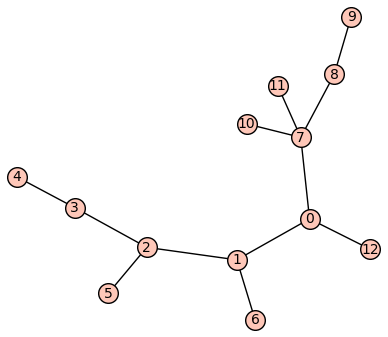

LhCaC?@?GA?G_? 22


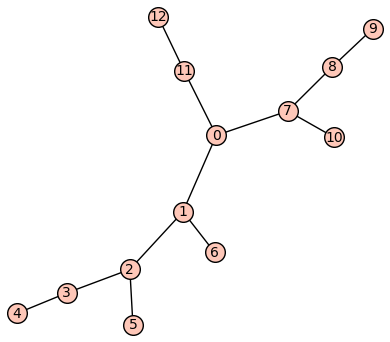

LhCaC?@?GAO??@ 22


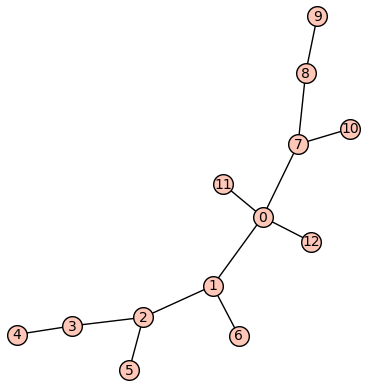

LhCaC?@?GAO?_? 22


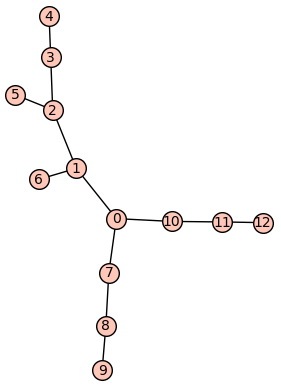

LhCaC?@?K??@?@ 22


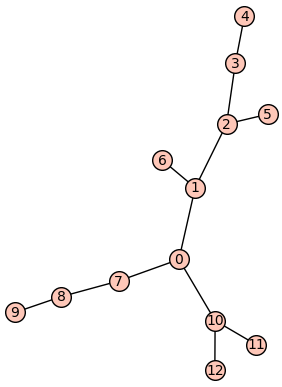

LhCaC?@?K??@?A 22


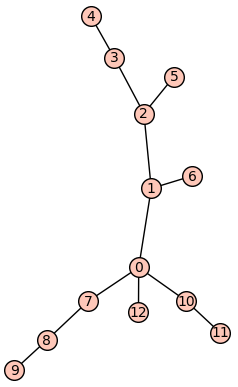

LhCaC?@?K??@_? 22


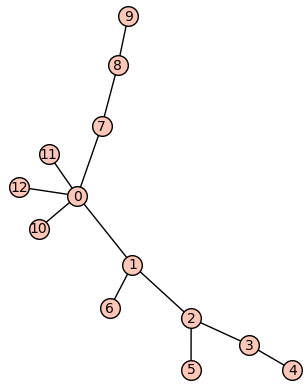

LhCaC?@?K?O?_? 22


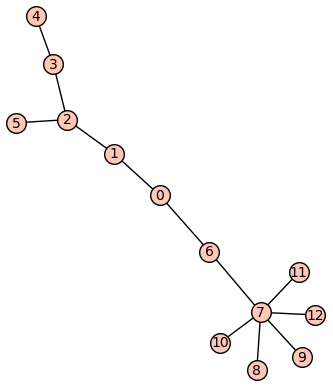

LhCc?C@?OA?G?O 25


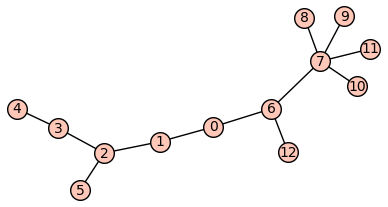

LhCc?C@?OA?G?_ 23


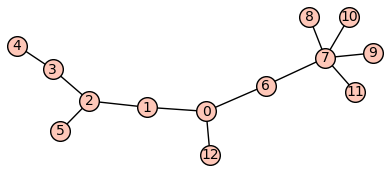

LhCc?C@?OA?G_? 21


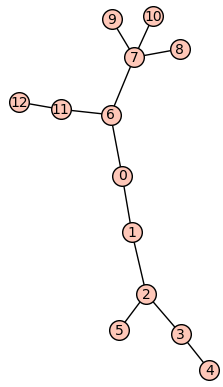

LhCc?C@?OA?O?@ 21


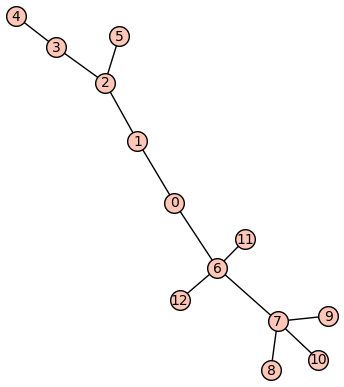

LhCc?C@?OA?O?_ 21


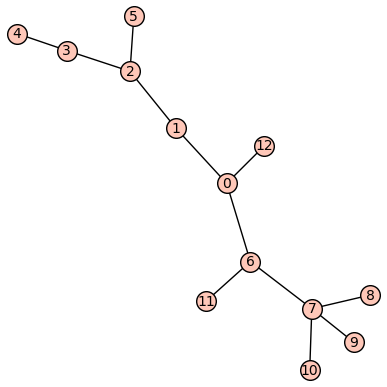

LhCc?C@?OA?O_? 20


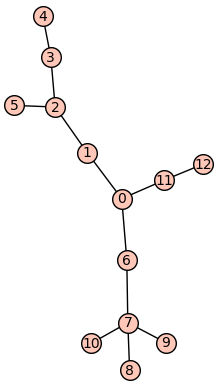

LhCc?C@?OAO??@ 20


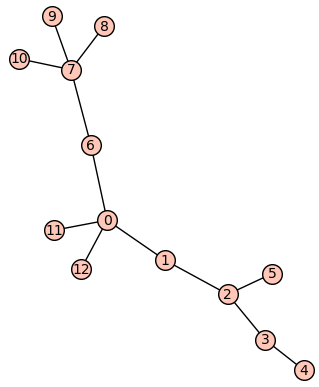

LhCc?C@?OAO?_? 20


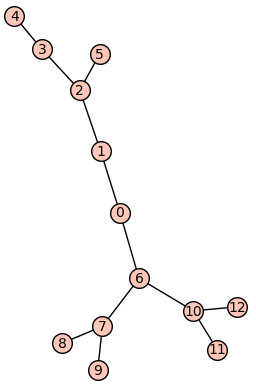

LhCc?C@?OC?@?A 20


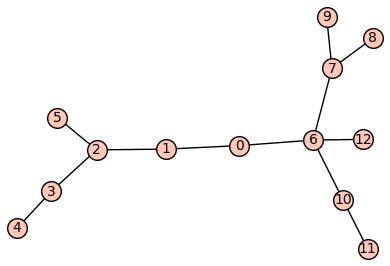

LhCc?C@?OC?@?_ 20


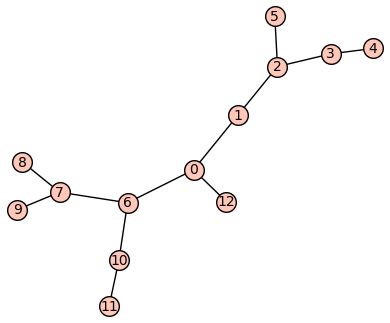

LhCc?C@?OC?@_? 20


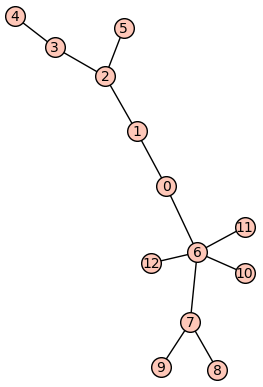

LhCc?C@?OC?O?_ 20


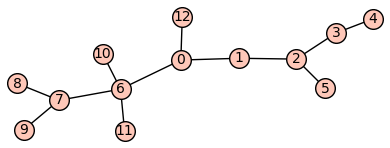

LhCc?C@?OC?O_? 20


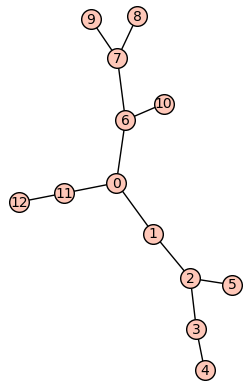

LhCc?C@?OCO??@ 20


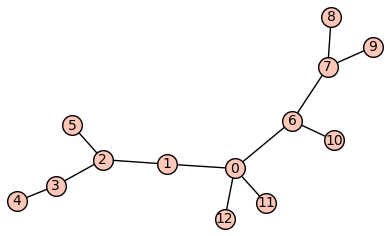

LhCc?C@?OCO?_? 20


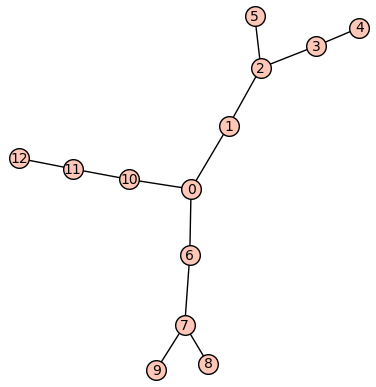

LhCc?C@?S??@?@ 20


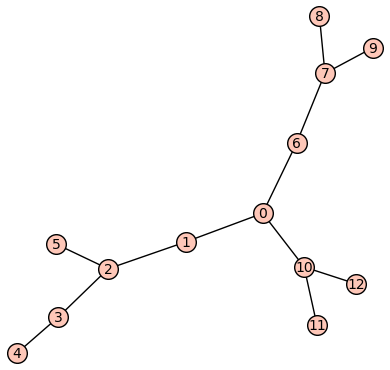

LhCc?C@?S??@?A 20


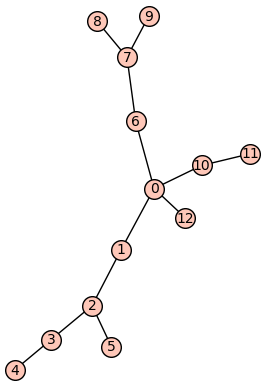

LhCc?C@?S??@_? 20


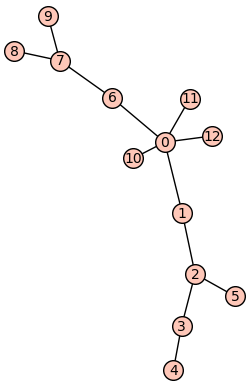

LhCc?C@?S?O?_? 20


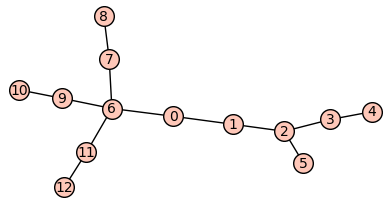

LhCc?C@?_?_O?@ 20


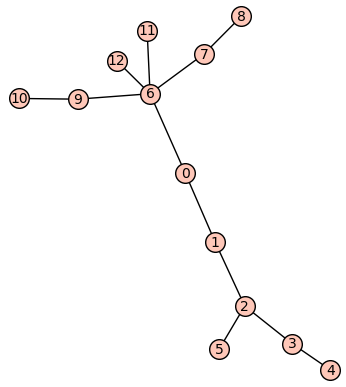

LhCc?C@?_?_O?_ 20


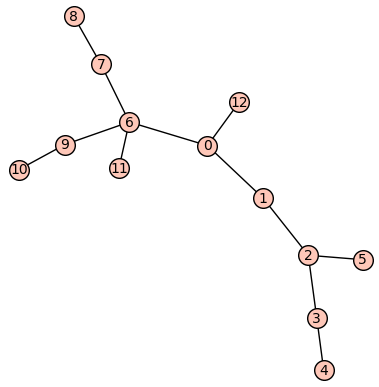

LhCc?C@?_?_O_? 20


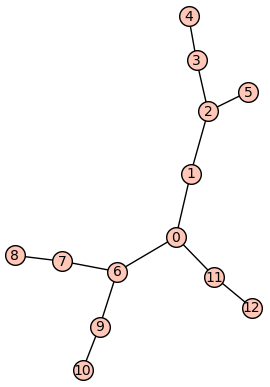

LhCc?C@?_?o??@ 20


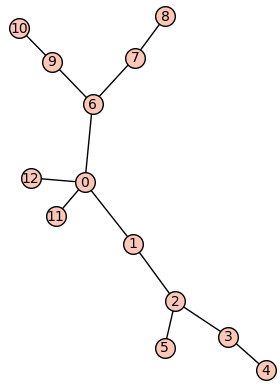

LhCc?C@?_?o?_? 20


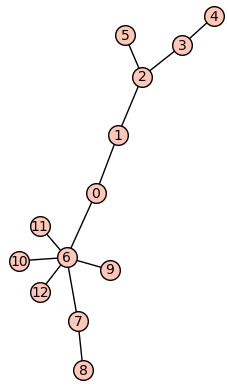

LhCc?C@?_C?O?_ 20


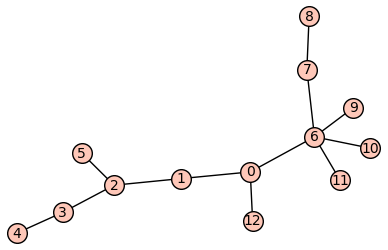

LhCc?C@?_C?O_? 20


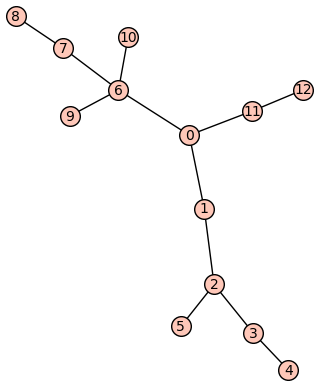

LhCc?C@?_CO??@ 20


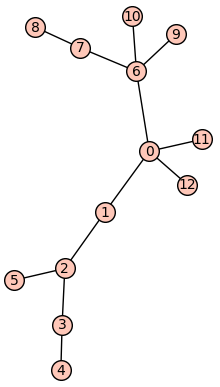

LhCc?C@?_CO?_? 20


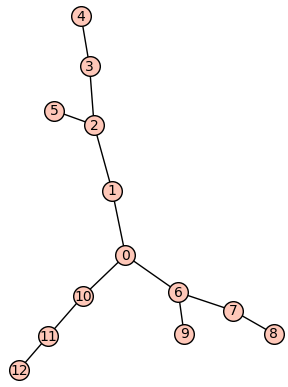

LhCc?C@?c??@?@ 20


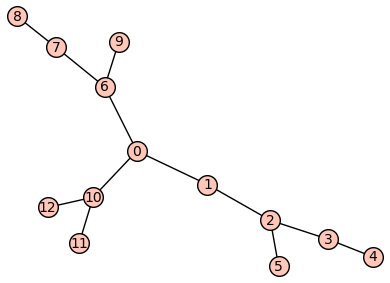

LhCc?C@?c??@?A 20


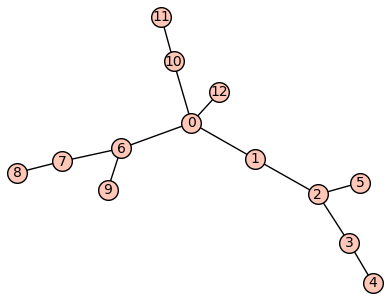

LhCc?C@?c??@_? 20


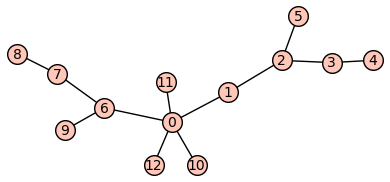

LhCc?C@?c?O?_? 20


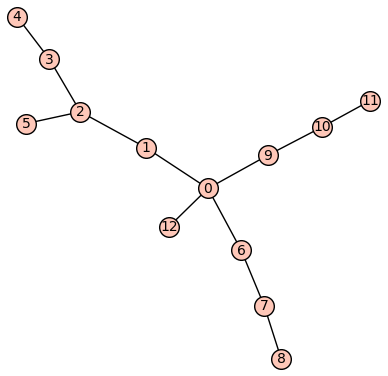

LhCc?C@_??_@_? 20


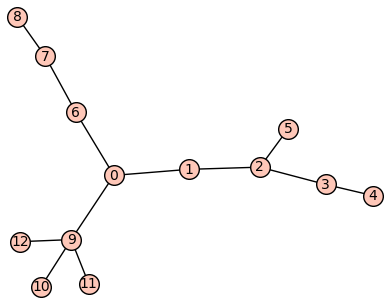

LhCc?C@_??_A?C 20


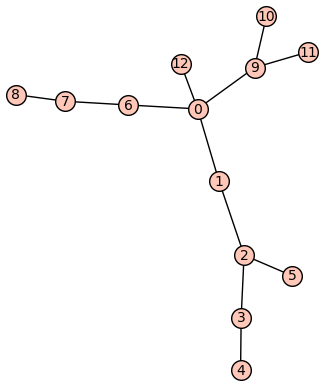

LhCc?C@_??_A_? 20


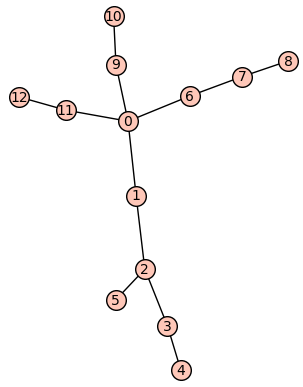

LhCc?C@_??o??@ 20


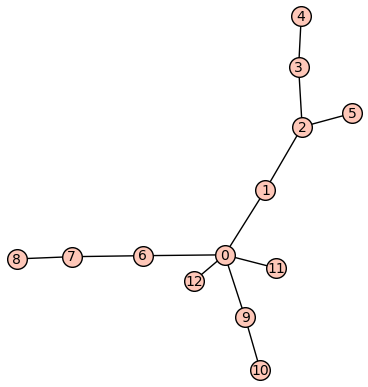

LhCc?C@_??o?_? 20


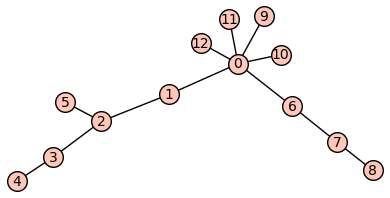

LhCc?C@_C?O?_? 20


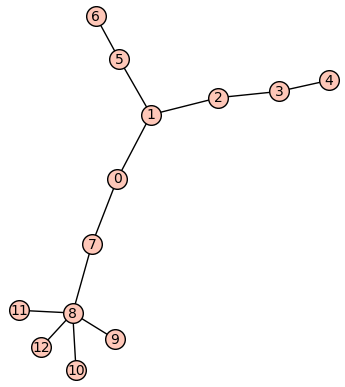

LhD?K?@?G@?C?G 21


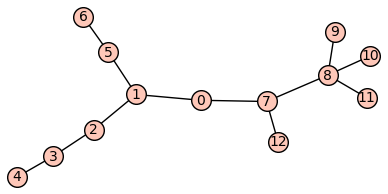

LhD?K?@?G@?C?O 20


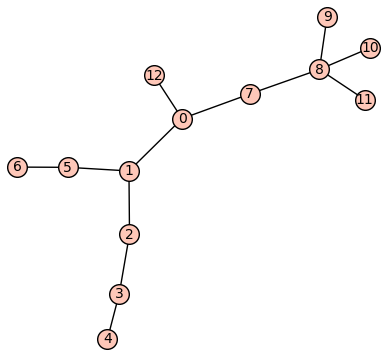

LhD?K?@?G@?C_? 20


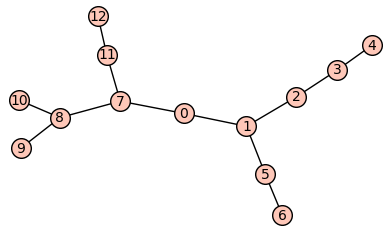

LhD?K?@?G@?G?@ 20


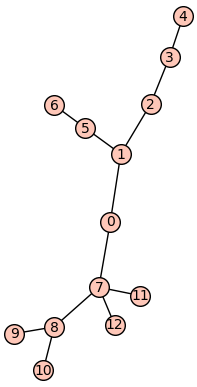

LhD?K?@?G@?G?O 20


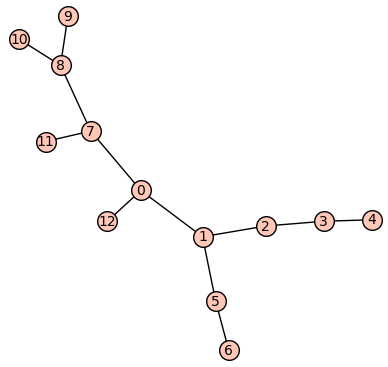

LhD?K?@?G@?G_? 20


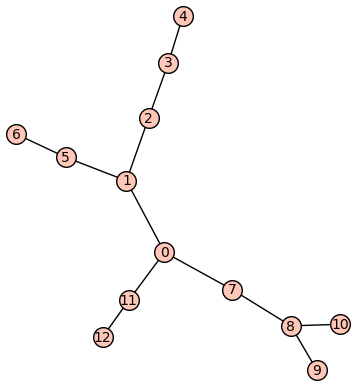

LhD?K?@?G@O??@ 20


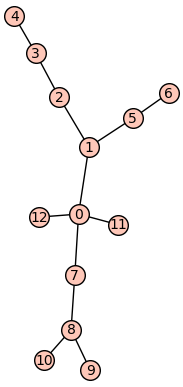

LhD?K?@?G@O?_? 20


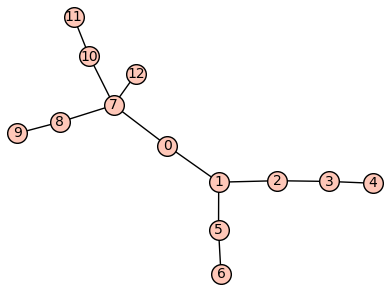

LhD?K?@?GA?@?O 20


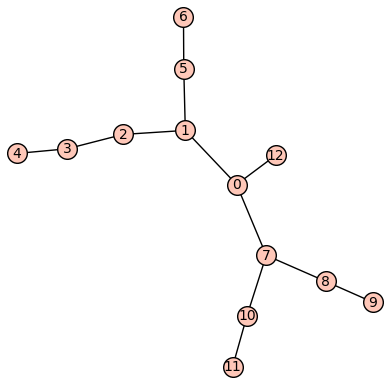

LhD?K?@?GA?@_? 20


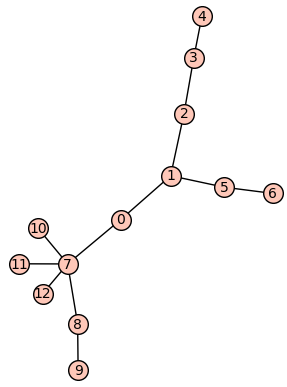

LhD?K?@?GA?G?O 20


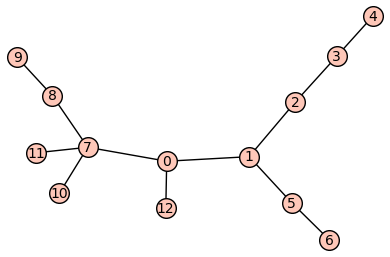

LhD?K?@?GA?G_? 20


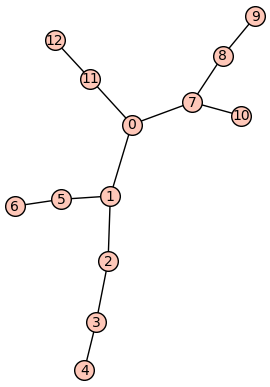

LhD?K?@?GAO??@ 20


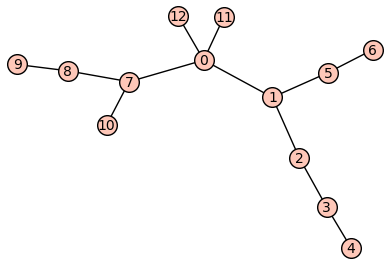

LhD?K?@?GAO?_? 20


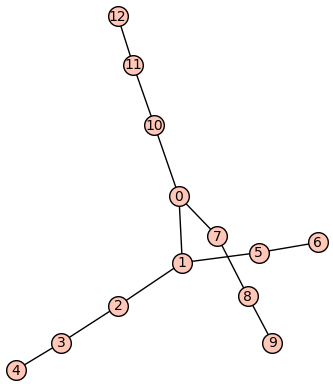

LhD?K?@?K??@?@ 20


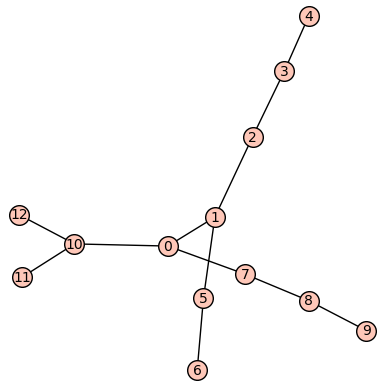

LhD?K?@?K??@?A 20


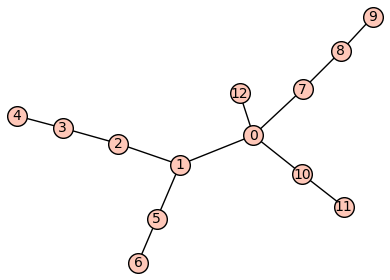

LhD?K?@?K??@_? 20


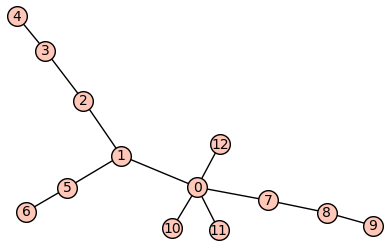

LhD?K?@?K?O?_? 20


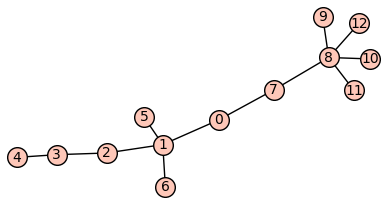

LhDAC?@?G@?C?G 21


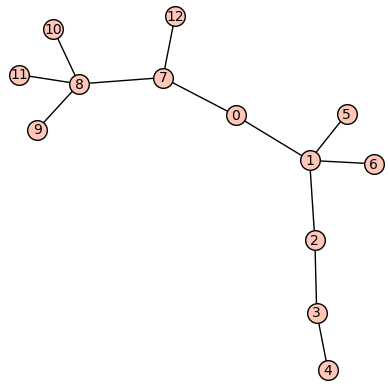

LhDAC?@?G@?C?O 20


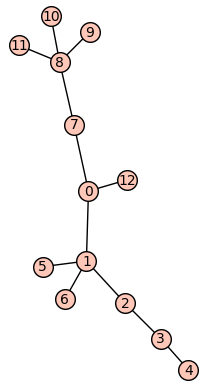

LhDAC?@?G@?C_? 20


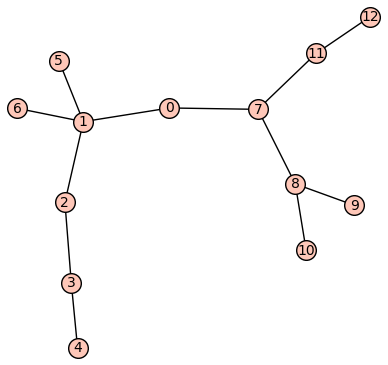

LhDAC?@?G@?G?@ 20


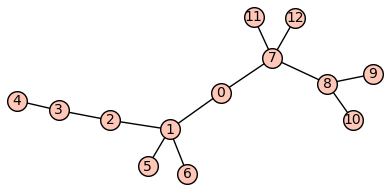

LhDAC?@?G@?G?O 20


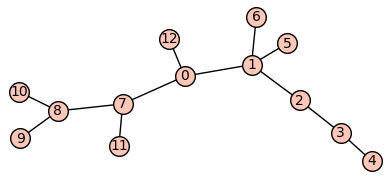

LhDAC?@?G@?G_? 20


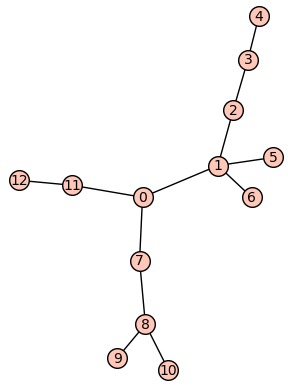

LhDAC?@?G@O??@ 20


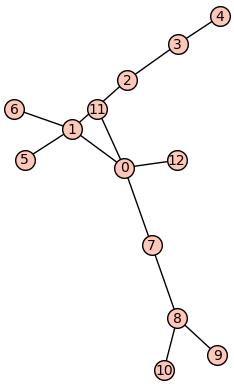

LhDAC?@?G@O?_? 20


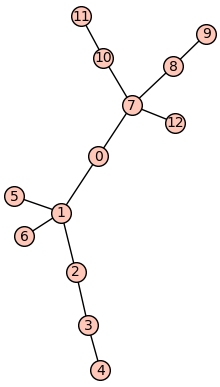

LhDAC?@?GA?@?O 20


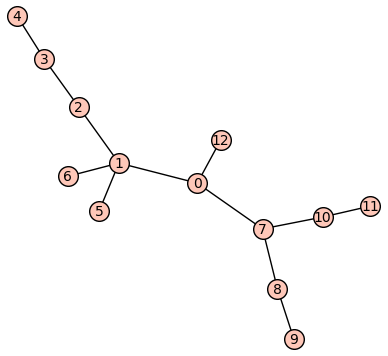

LhDAC?@?GA?@_? 20


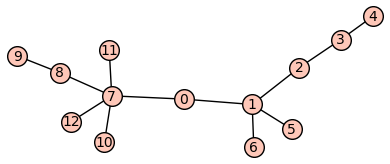

LhDAC?@?GA?G?O 20


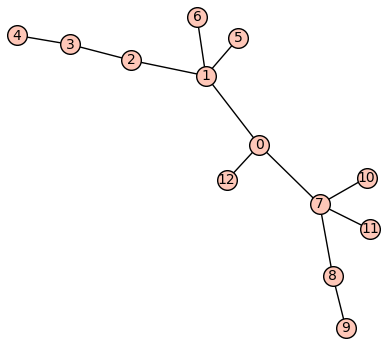

LhDAC?@?GA?G_? 20


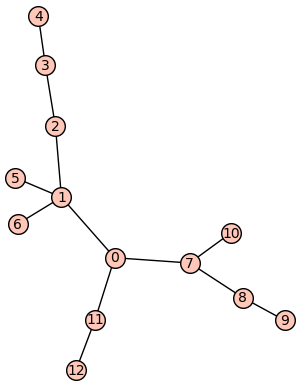

LhDAC?@?GAO??@ 20


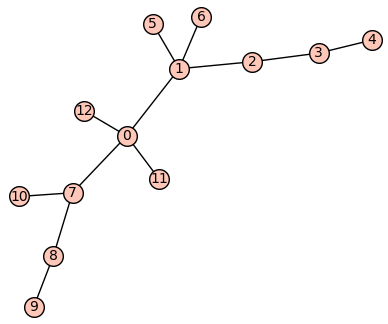

LhDAC?@?GAO?_? 20


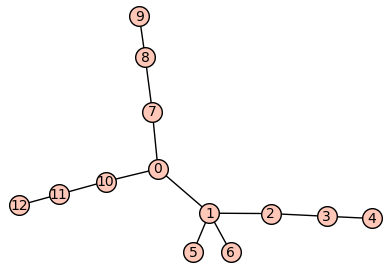

LhDAC?@?K??@?@ 20


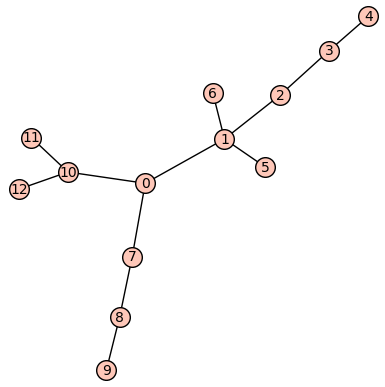

LhDAC?@?K??@?A 20


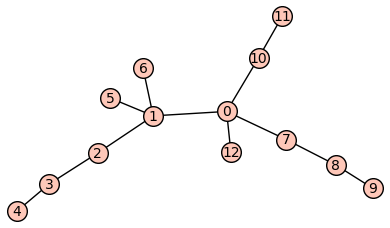

LhDAC?@?K??@_? 20


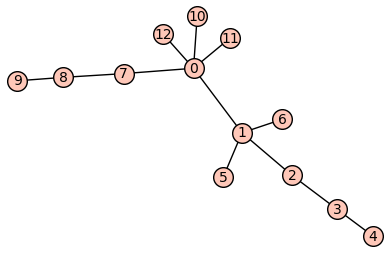

LhDAC?@?K?O?_? 20


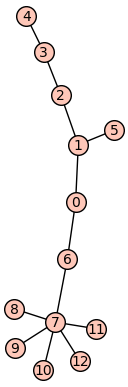

LhDC?C@?OA?G?O 25


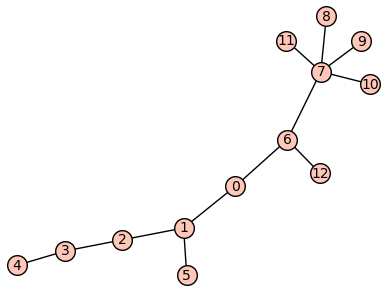

LhDC?C@?OA?G?_ 23


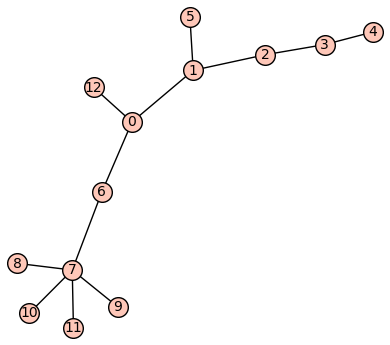

LhDC?C@?OA?G_? 21


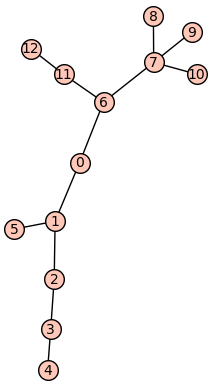

LhDC?C@?OA?O?@ 21


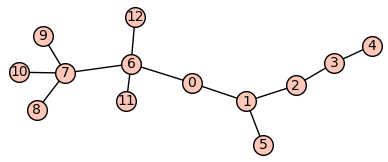

LhDC?C@?OA?O?_ 21


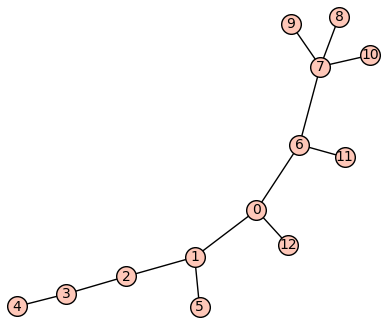

LhDC?C@?OA?O_? 19


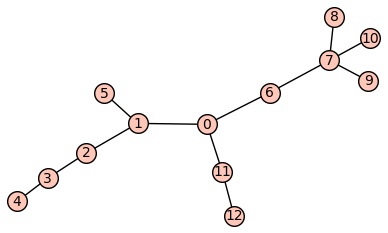

LhDC?C@?OAO??@ 18


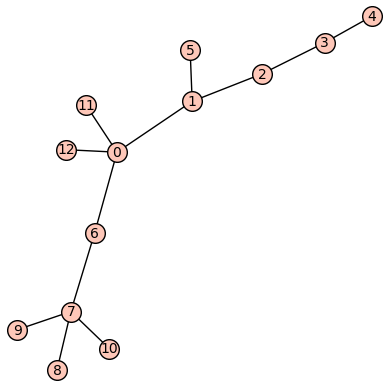

LhDC?C@?OAO?_? 18


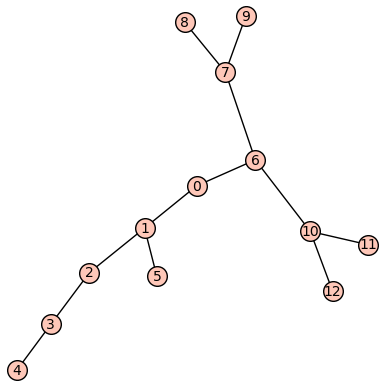

LhDC?C@?OC?@?A 19


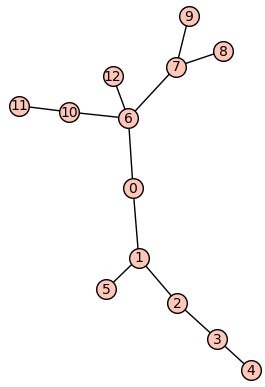

LhDC?C@?OC?@?_ 19


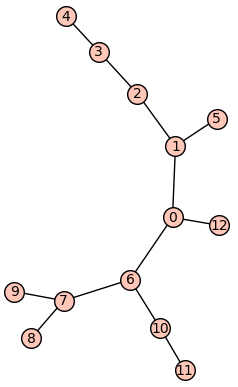

LhDC?C@?OC?@_? 18


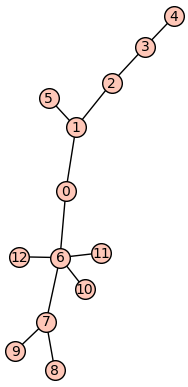

LhDC?C@?OC?O?_ 19


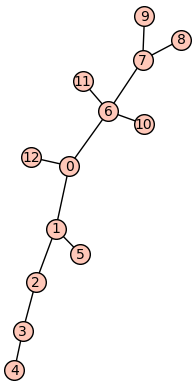

LhDC?C@?OC?O_? 18


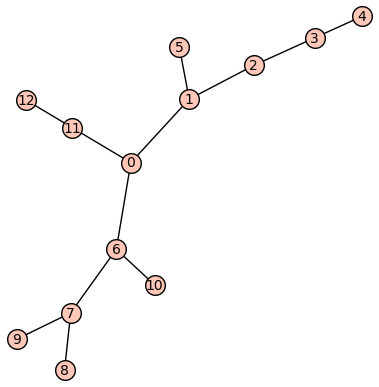

LhDC?C@?OCO??@ 18


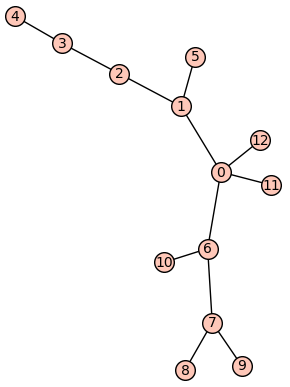

LhDC?C@?OCO?_? 18


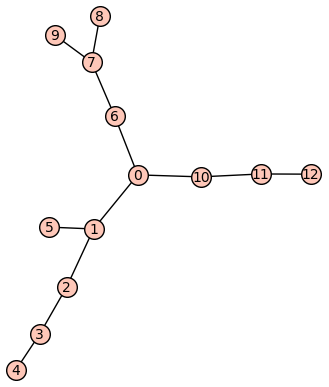

LhDC?C@?S??@?@ 18


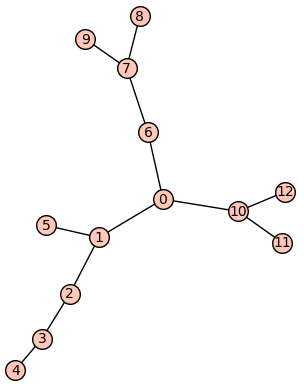

LhDC?C@?S??@?A 18


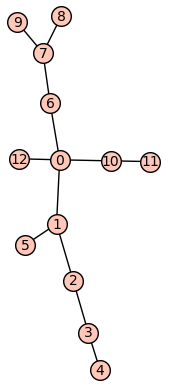

LhDC?C@?S??@_? 18


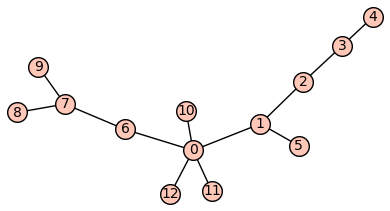

LhDC?C@?S?O?_? 18


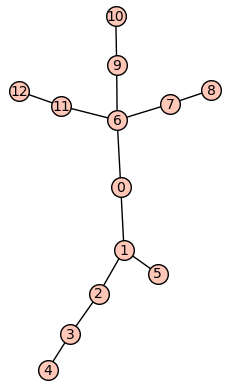

LhDC?C@?_?_O?@ 18


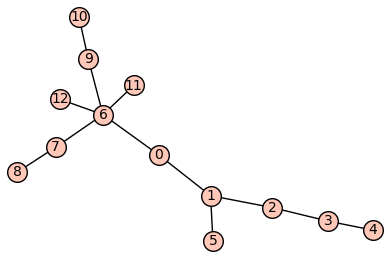

LhDC?C@?_?_O?_ 18


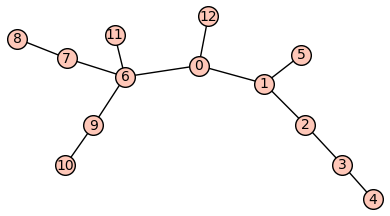

LhDC?C@?_?_O_? 18


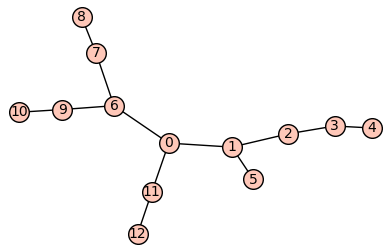

LhDC?C@?_?o??@ 18


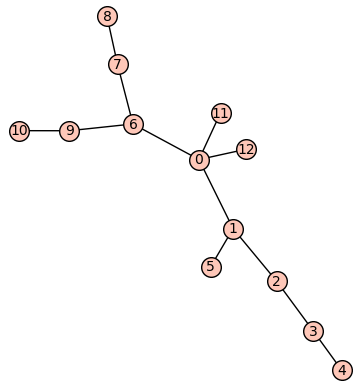

LhDC?C@?_?o?_? 18


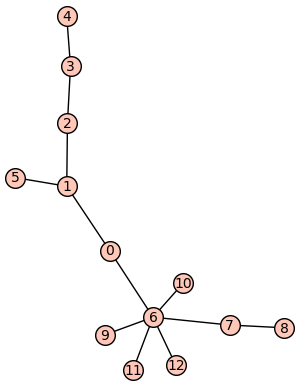

LhDC?C@?_C?O?_ 18


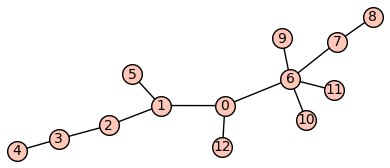

LhDC?C@?_C?O_? 18


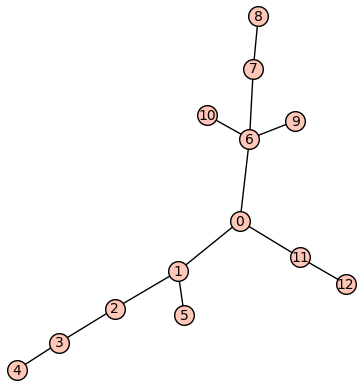

LhDC?C@?_CO??@ 18


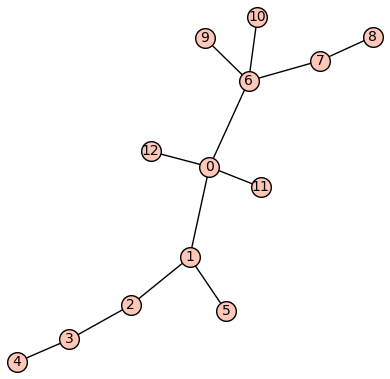

LhDC?C@?_CO?_? 18


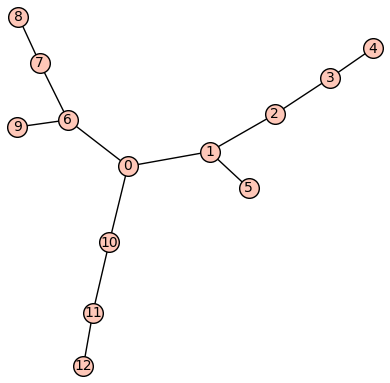

LhDC?C@?c??@?@ 18


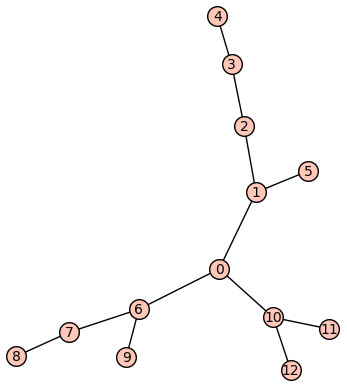

LhDC?C@?c??@?A 18


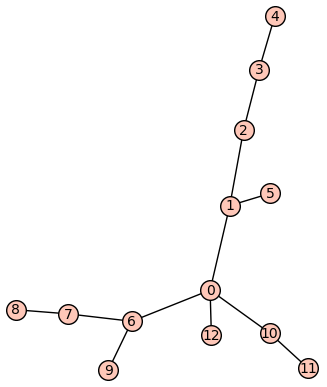

LhDC?C@?c??@_? 18


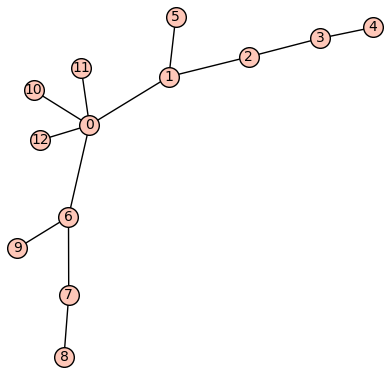

LhDC?C@?c?O?_? 18


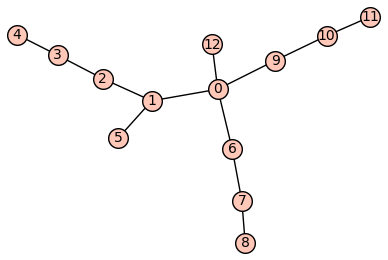

LhDC?C@_??_@_? 18


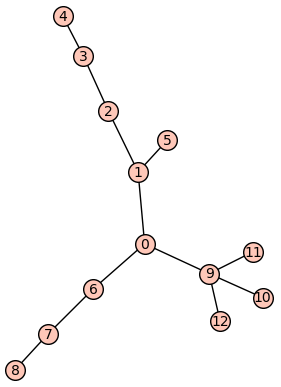

LhDC?C@_??_A?C 18


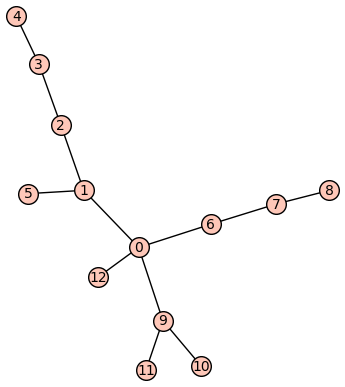

LhDC?C@_??_A_? 18


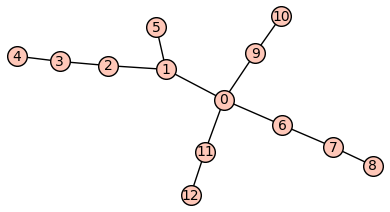

LhDC?C@_??o??@ 18


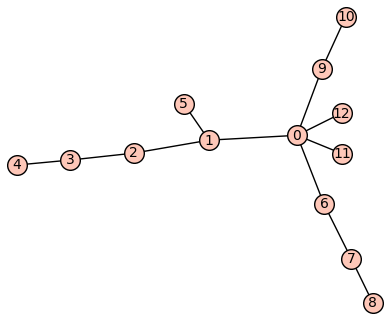

LhDC?C@_??o?_? 18


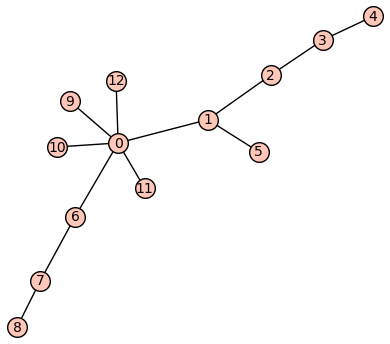

LhDC?C@_C?O?_? 18


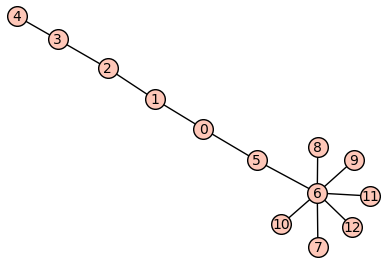

LhE?GCA?_C?O?_ 25


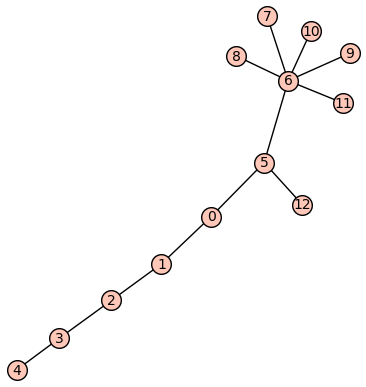

LhE?GCA?_C?O@? 25


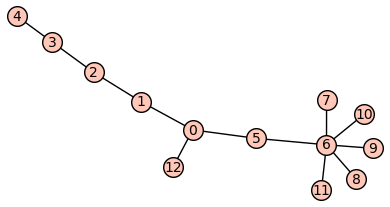

LhE?GCA?_C?O_? 25


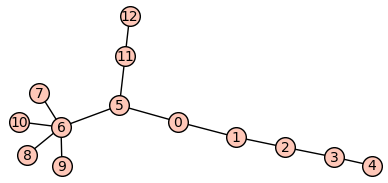

LhE?GCA?_C?_?@ 25


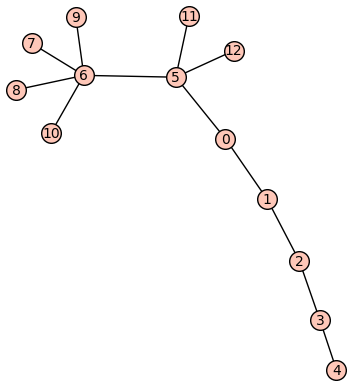

LhE?GCA?_C?_@? 25


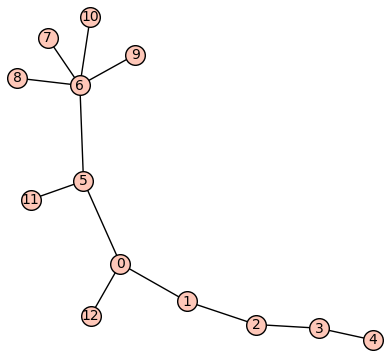

LhE?GCA?_C?__? 23


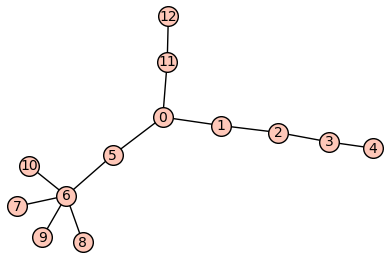

LhE?GCA?_CO??@ 21


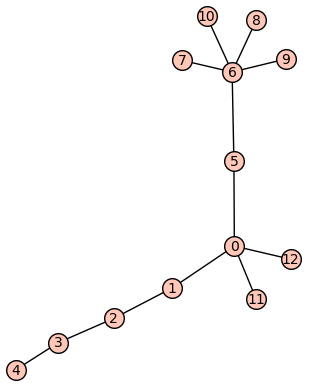

LhE?GCA?_CO?_? 21


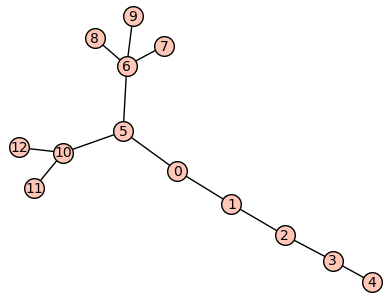

LhE?GCA?_G?@?A 23


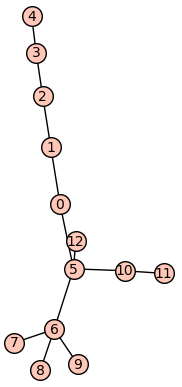

LhE?GCA?_G?@@? 23


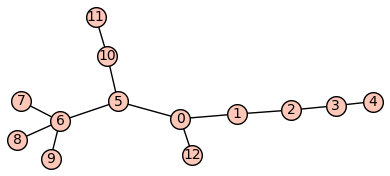

LhE?GCA?_G?@_? 21


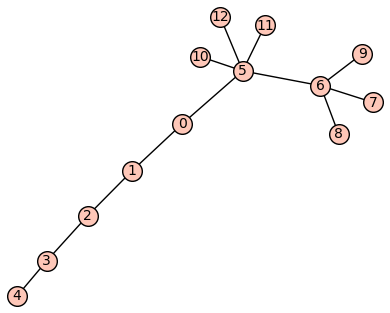

LhE?GCA?_G?_@? 23


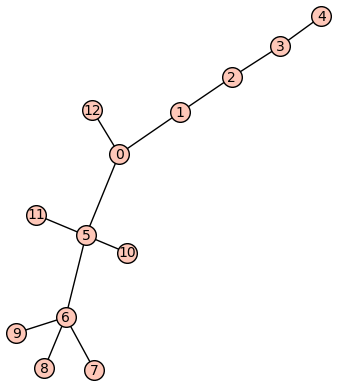

LhE?GCA?_G?__? 21


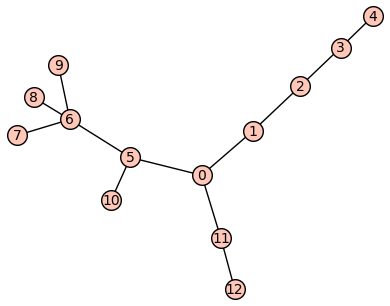

LhE?GCA?_GO??@ 19


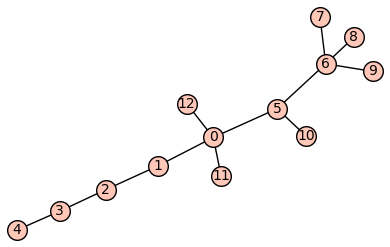

LhE?GCA?_GO?_? 19


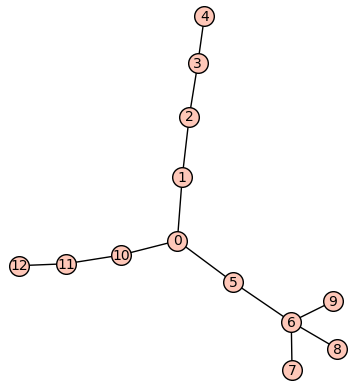

LhE?GCA?c??@?@ 17


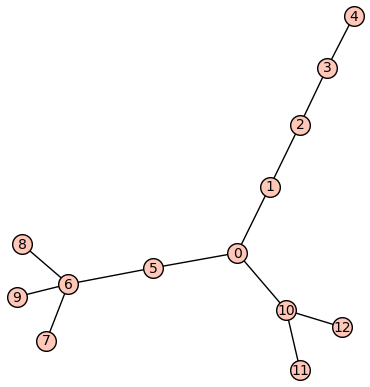

LhE?GCA?c??@?A 17


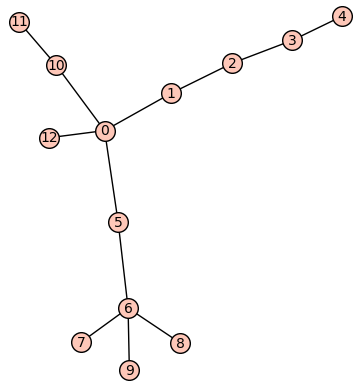

LhE?GCA?c??@_? 17


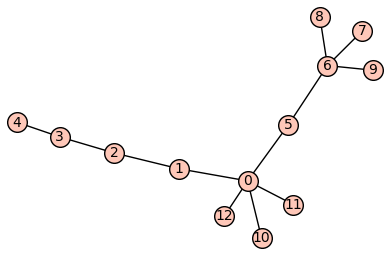

LhE?GCA?c?O?_? 17


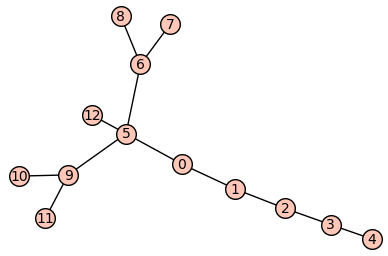

LhE?GCA@??_A@? 21


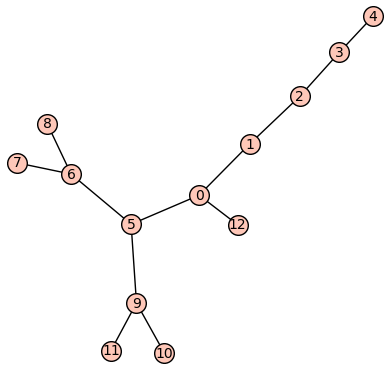

LhE?GCA@??_A_? 19


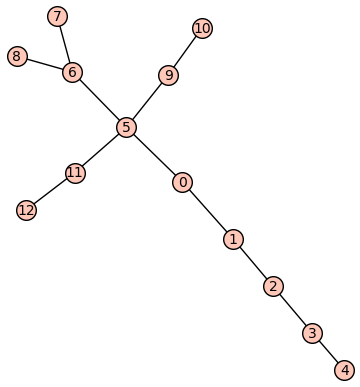

LhE?GCA@??__?@ 21


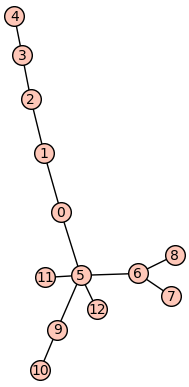

LhE?GCA@??__@? 21


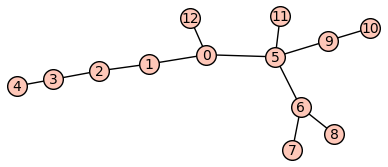

LhE?GCA@??___? 19


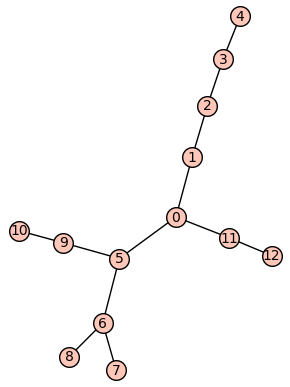

LhE?GCA@??o??@ 17


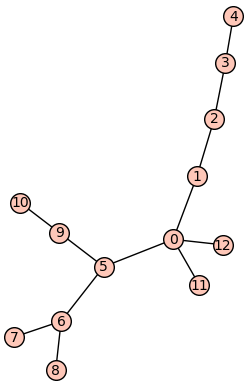

LhE?GCA@??o?_? 17


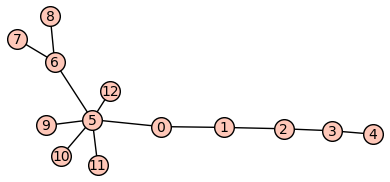

LhE?GCA@?G?_@? 21


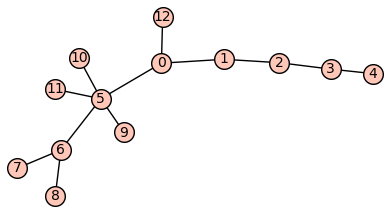

LhE?GCA@?G?__? 19


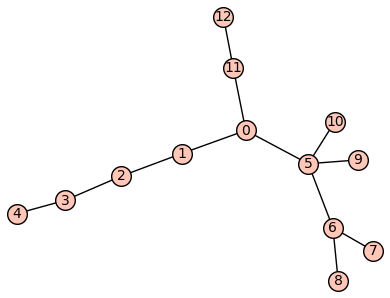

LhE?GCA@?GO??@ 17


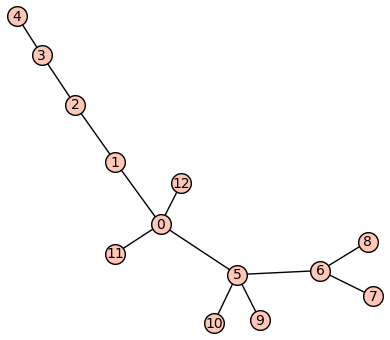

LhE?GCA@?GO?_? 17


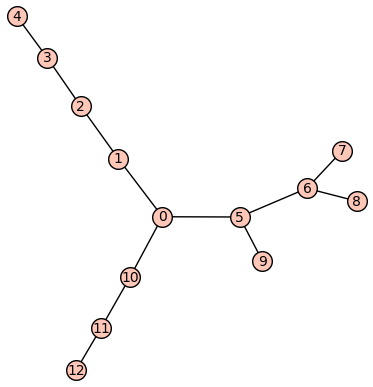

LhE?GCA@C??@?@ 16


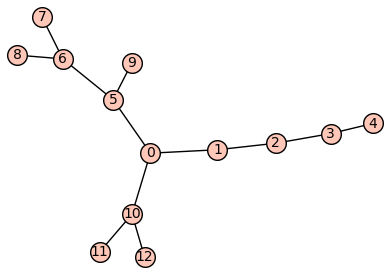

LhE?GCA@C??@?A 16


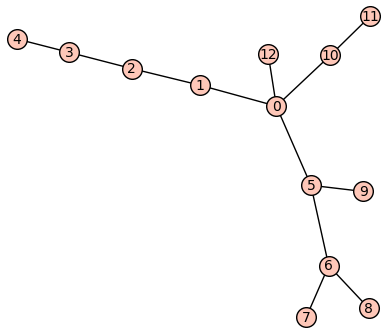

LhE?GCA@C??@_? 16


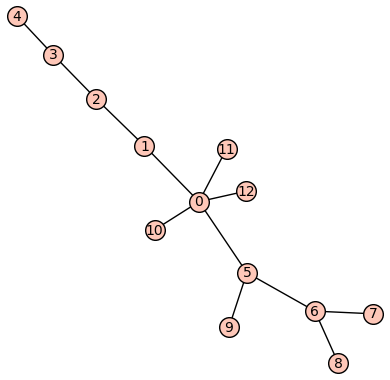

LhE?GCA@C?O?_? 16


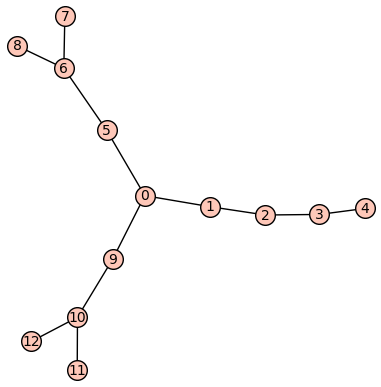

LhE?GCA_??_@?A 16


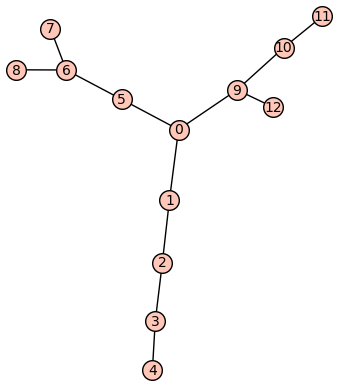

LhE?GCA_??_@?C 16


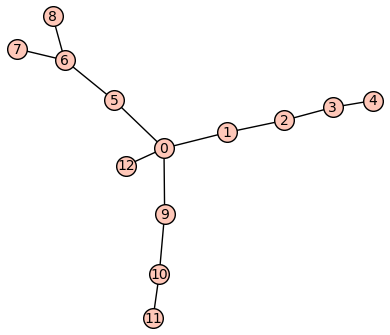

LhE?GCA_??_@_? 16


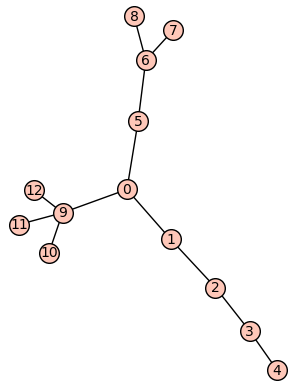

LhE?GCA_??_A?C 16


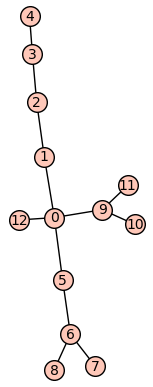

LhE?GCA_??_A_? 16


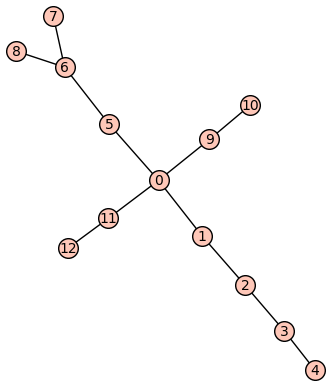

LhE?GCA_??o??@ 16


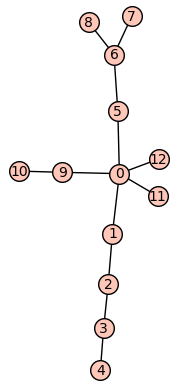

LhE?GCA_??o?_? 16


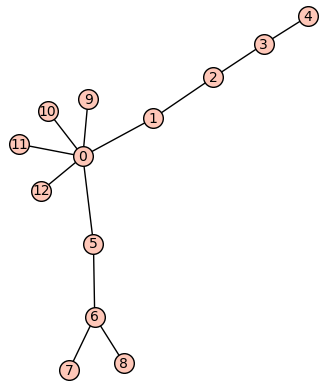

LhE?GCA_C?O?_? 16


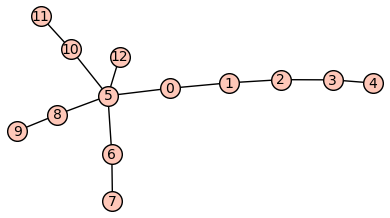

LhE?GCC?GG?@@? 19


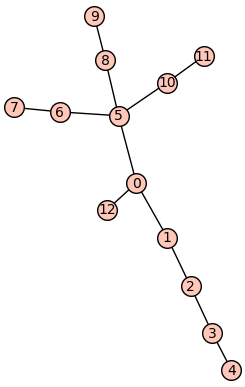

LhE?GCC?GG?@_? 17


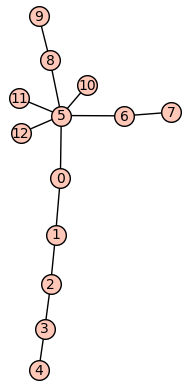

LhE?GCC?GG?_@? 19


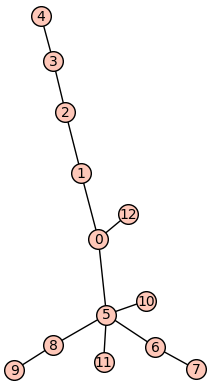

LhE?GCC?GG?__? 17


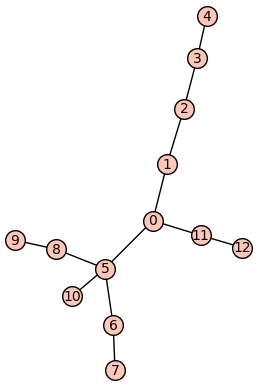

LhE?GCC?GGO??@ 16


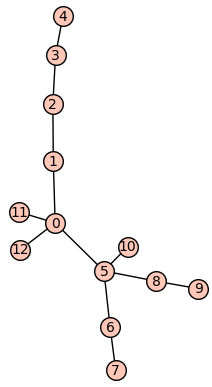

LhE?GCC?GGO?_? 16


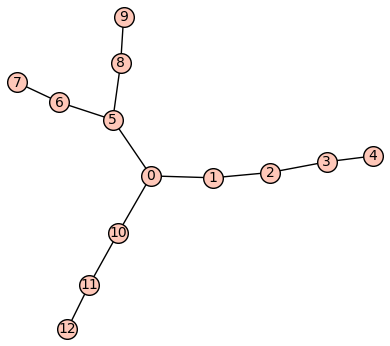

LhE?GCC?K??@?@ 16


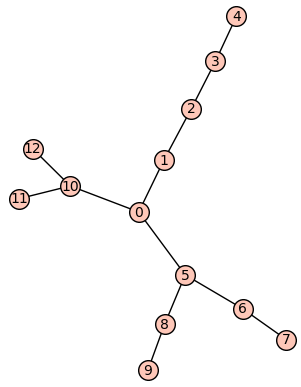

LhE?GCC?K??@?A 16


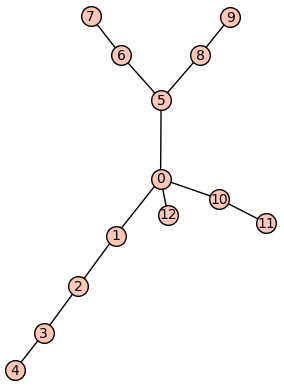

LhE?GCC?K??@_? 16


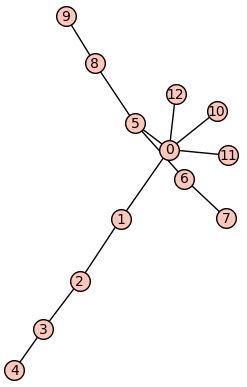

LhE?GCC?K?O?_? 16


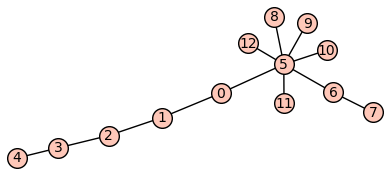

LhE?GCC@?G?_@? 19


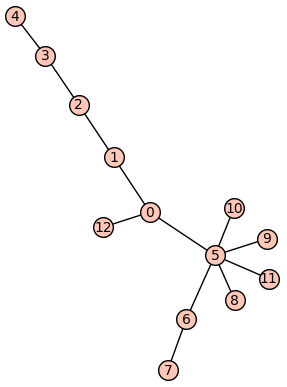

LhE?GCC@?G?__? 17


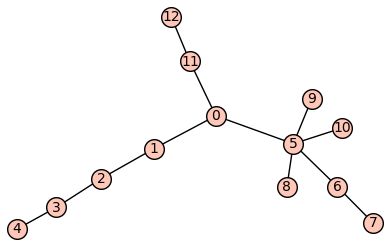

LhE?GCC@?GO??@ 16


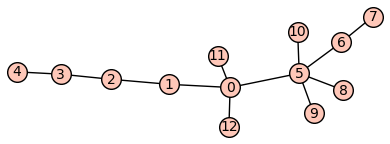

LhE?GCC@?GO?_? 16


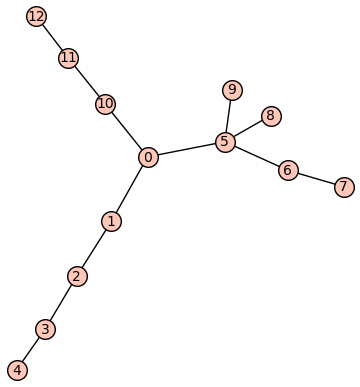

LhE?GCC@C??@?@ 16


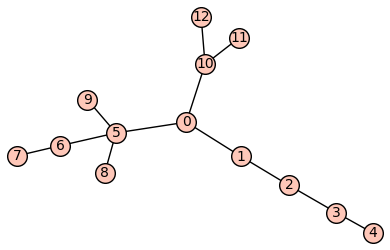

LhE?GCC@C??@?A 16


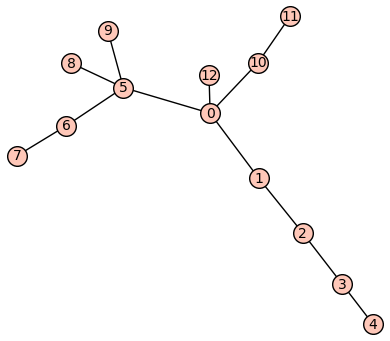

LhE?GCC@C??@_? 16


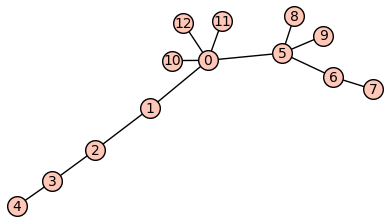

LhE?GCC@C?O?_? 16


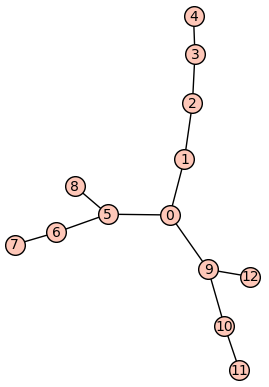

LhE?GCC_??_@?C 16


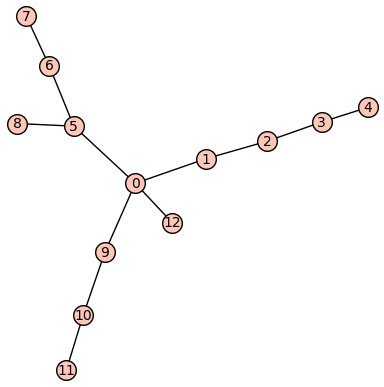

LhE?GCC_??_@_? 16


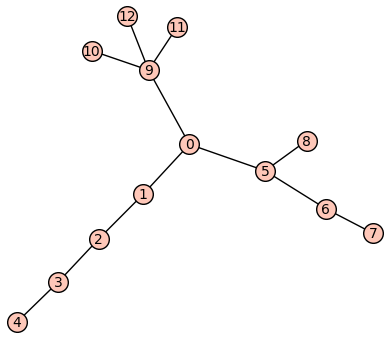

LhE?GCC_??_A?C 16


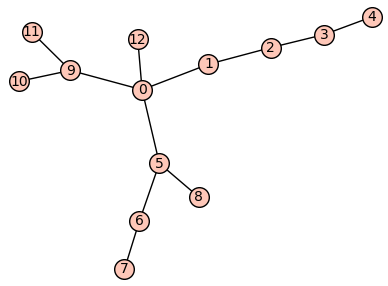

LhE?GCC_??_A_? 16


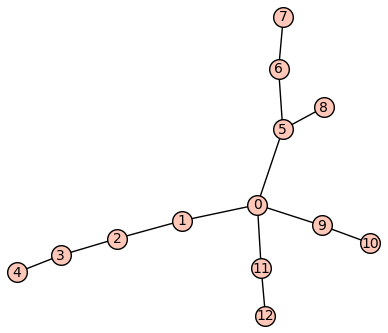

LhE?GCC_??o??@ 16


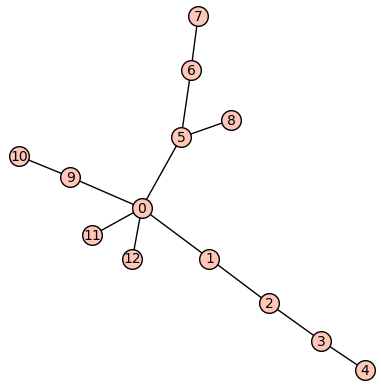

LhE?GCC_??o?_? 16


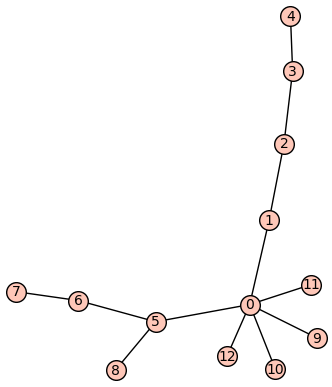

LhE?GCC_C?O?_? 16


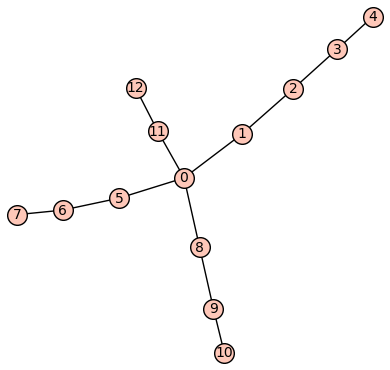

LhE?GE??G?o??@ 16


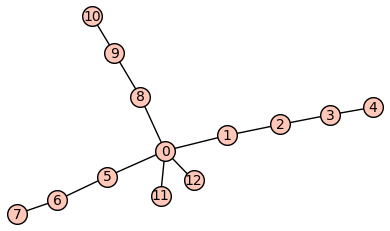

LhE?GE??G?o?_? 16


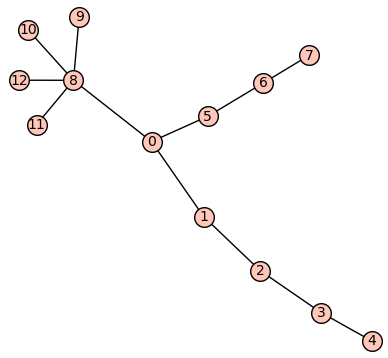

LhE?GE??G@?C?G 16


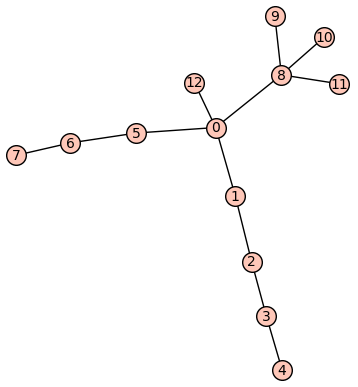

LhE?GE??G@?C_? 16


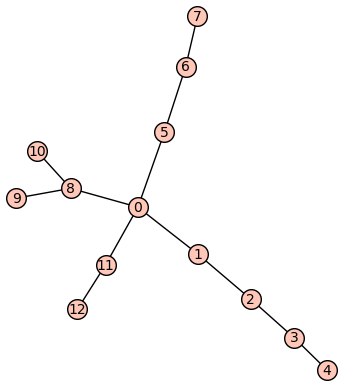

LhE?GE??G@O??@ 16


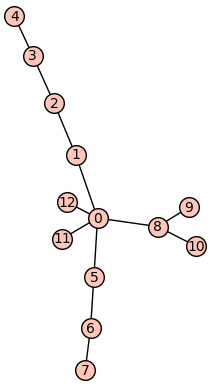

LhE?GE??G@O?_? 16


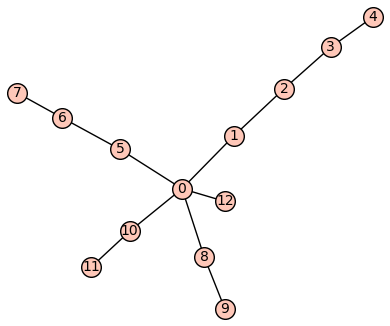

LhE?GE??K??@_? 16


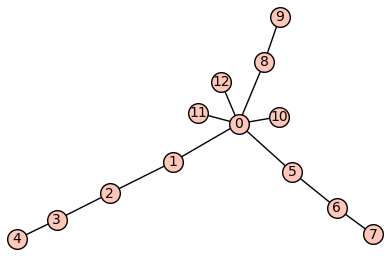

LhE?GE??K?O?_? 16


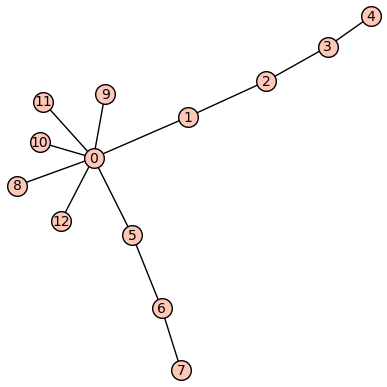

LhE?GE?_C?O?_? 16


[28,
 28,
 28,
 28,
 28,
 28,
 26,
 26,
 28,
 26,
 28,
 26,
 24,
 24,
 22,
 22,
 22,
 22,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 24,
 24,
 22,
 22,
 22,
 22,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 22,
 22,
 22,
 22,
 25,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 22,
 22,
 22,
 22,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 25,
 23,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,


In [31]:
min_min_pessimal(13,7)

## 6/22:

### Lemma about min for lever graph

In [35]:
def lever_maker(diameter, vertex, leaves):
        path = graphs.PathGraph(diameter+1)
        for i in range(leaves):
            path.add_edge(vertex, diameter+i+leaves)
        lever_string = path.graph6_string()
        lever = Graph(lever_string)
        return lever

In [46]:
def double_lever_maker(diameter, left_vertex, right_vertex, left_leaves, right_leaves):
        path = graphs.PathGraph(diameter+1)
        for i in range(left_leaves):
            path.add_edge(left_vertex, diameter+i+left_leaves)
        for i in range(right_leaves):
            path.add_edge(right_vertex, right_leaves+diameter+i+left_leaves)
        double_lever_string = path.graph6_string()
        double_lever = Graph(double_lever_string)
        return double_lever

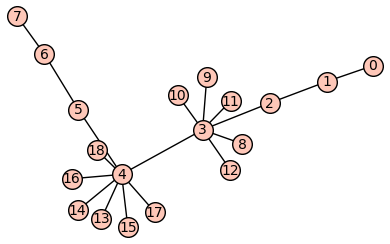

26
[  0   1   4   9  26  57  90 125  44  44  44  44  44  61  61  61  61  61  61]
[ 35   0   3   8  25  56  89 124  43  43  43  43  43  60  60  60  60  60  60]
[ 68  33   0   5  22  53  86 121  40  40  40  40  40  57  57  57  57  57  57]
[ 99  64  31   0  17  48  81 116  35  35  35  35  35  52  52  52  52  52  52]
[118  83  50  19   0  31  64  99  54  54  54  54  54  35  35  35  35  35  35]
[123  88  55  24   5   0  33  68  59  59  59  59  59  40  40  40  40  40  40]
[126  91  58  27   8   3   0  35  62  62  62  62  62  43  43  43  43  43  43]
[127  92  59  28   9   4   1   0  63  63  63  63  63  44  44  44  44  44  44]
[100  65  32   1  18  49  82 117   0  36  36  36  36  53  53  53  53  53  53]
[100  65  32   1  18  49  82 117  36   0  36  36  36  53  53  53  53  53  53]
[100  65  32   1  18  49  82 117  36  36   0  36  36  53  53  53  53  53  53]
[100  65  32   1  18  49  82 117  36  36  36   0  36  53  53  53  53  53  53]
[100  65  32   1  18  49  82 117  36  36  36  36   0  53  53 

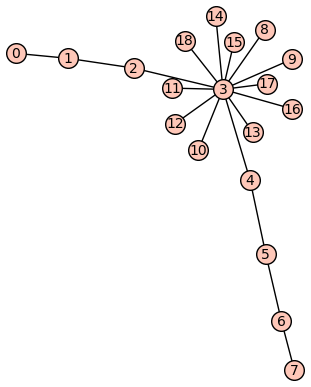

16


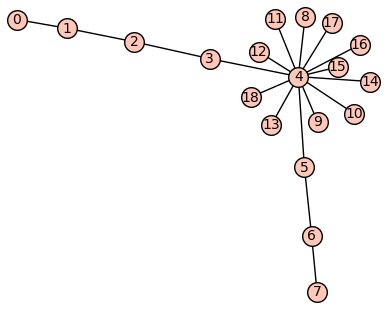

16


In [53]:
A = double_lever_maker(7,3,4,5,6)
A.show()
print(min_pessimal(A))
print(hitting_time_matrix(A))
B = lever_maker(7,3,11)
B.show()
print(min_pessimal(B))
C = lever_maker(7,4,11)
C.show()
print(min_pessimal(C))

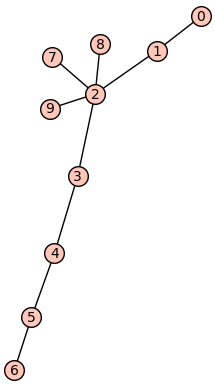

16

In [36]:
A = lever_maker(6,2,3)
A.show()
hitting_time(A,6,2)

In [34]:
min_pessimal(A)

41

In [41]:
for i in range(0,12):
    A = lever_maker(7,i,6)
    print(i, min_pessimal(A))

0 29
1 25
2 21
3 16
4 16
5 21
6 25
7 29


SignError: cannot add infinity to minus infinity

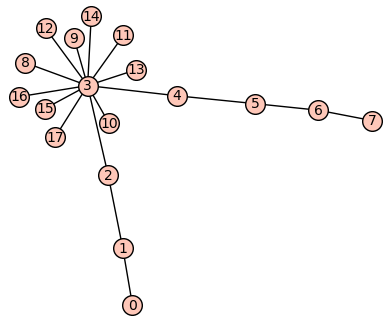

[  0   1   4   9  36  65  96 129  42  42  42  42  42  42  42  42  42  42]
[ 33   0   3   8  35  64  95 128  41  41  41  41  41  41  41  41  41  41]
[ 64  31   0   5  32  61  92 125  38  38  38  38  38  38  38  38  38  38]
[ 93  60  29   0  27  56  87 120  33  33  33  33  33  33  33  33  33  33]
[100  67  36   7   0  29  60  93  40  40  40  40  40  40  40  40  40  40]
[105  72  41  12   5   0  31  64  45  45  45  45  45  45  45  45  45  45]
[108  75  44  15   8   3   0  33  48  48  48  48  48  48  48  48  48  48]
[109  76  45  16   9   4   1   0  49  49  49  49  49  49  49  49  49  49]
[ 94  61  30   1  28  57  88 121   0  34  34  34  34  34  34  34  34  34]
[ 94  61  30   1  28  57  88 121  34   0  34  34  34  34  34  34  34  34]
[ 94  61  30   1  28  57  88 121  34  34   0  34  34  34  34  34  34  34]
[ 94  61  30   1  28  57  88 121  34  34  34   0  34  34  34  34  34  34]
[ 94  61  30   1  28  57  88 121  34  34  34  34   0  34  34  34  34  34]
[ 94  61  30   1  28  57  88 121  34  

In [906]:
A = lever_maker(6,3,10)
A.show()
hitting_time_matrix(A)

In [907]:
min_pessimal(A)

16

## 6/21:

### Turning double brooms into seesaw/lever(?) graph

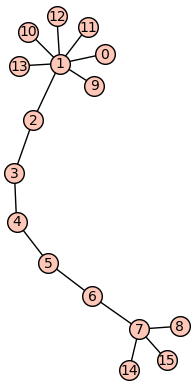

[  0   1  14  29  46  65  86 109 138  30  30  30  30  30 138 138]
[ 29   0  13  28  45  64  85 108 137  29  29  29  29  29 137 137]
[ 46  17   0  15  32  51  72  95 124  46  46  46  46  46 124 124]
[ 61  32  15   0  17  36  57  80 109  61  61  61  61  61 109 109]
[ 74  45  28  13   0  19  40  63  92  74  74  74  74  74  92  92]
[ 85  56  39  24  11   0  21  44  73  85  85  85  85  85  73  73]
[ 94  65  48  33  20   9   0  23  52  94  94  94  94  94  52  52]
[101  72  55  40  27  16   7   0  29 101 101 101 101 101  29  29]
[102  73  56  41  28  17   8   1   0 102 102 102 102 102  30  30]
[ 30   1  14  29  46  65  86 109 138   0  30  30  30  30 138 138]
[ 30   1  14  29  46  65  86 109 138  30   0  30  30  30 138 138]
[ 30   1  14  29  46  65  86 109 138  30  30   0  30  30 138 138]
[ 30   1  14  29  46  65  86 109 138  30  30  30   0  30 138 138]
[ 30   1  14  29  46  65  86 109 138  30  30  30  30   0 138 138]
[102  73  56  41  28  17   8   1  30 102 102 102 102 102   0  30]
[102  73  

In [12]:
A = Graph({0:[1],1:[2,9,10,11,12,13],2:[3],3:[4],4:[5],5:[6],6:[7],7:[14,15,8]})
A.show()
hitting_time_matrix(A)

In [13]:
min_pessimal(A) 

41

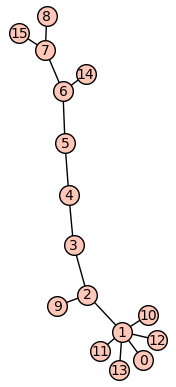

[  0   1  12  27  44  63  84 109 138  41  30  30  30  30 113 138]
[ 29   0  11  26  43  62  83 108 137  40  29  29  29  29 112 137]
[ 48  19   0  15  32  51  72  97 126  29  48  48  48  48 101 126]
[ 63  34  15   0  17  36  57  82 111  44  63  63  63  63  86 111]
[ 76  47  28  13   0  19  40  65  94  57  76  76  76  76  69  94]
[ 87  58  39  24  11   0  21  46  75  68  87  87  87  87  50  75]
[ 96  67  48  33  20   9   0  25  54  77  96  96  96  96  29  54]
[101  72  53  38  25  14   5   0  29  82 101 101 101 101  34  29]
[102  73  54  39  26  15   6   1   0  83 102 102 102 102  35  30]
[ 49  20   1  16  33  52  73  98 127   0  49  49  49  49 102 127]
[ 30   1  12  27  44  63  84 109 138  41   0  30  30  30 113 138]
[ 30   1  12  27  44  63  84 109 138  41  30   0  30  30 113 138]
[ 30   1  12  27  44  63  84 109 138  41  30  30   0  30 113 138]
[ 30   1  12  27  44  63  84 109 138  41  30  30  30   0 113 138]
[ 97  68  49  34  21  10   1  26  55  78  97  97  97  97   0  55]
[102  73  

In [14]:
B = A.copy()
B.delete_edge(1,9)
B.delete_edge(7,14)
B.add_edge(2,9)
B.add_edge(6,14)
B.show()
hitting_time_matrix(B)

In [15]:
min_pessimal(B)

39

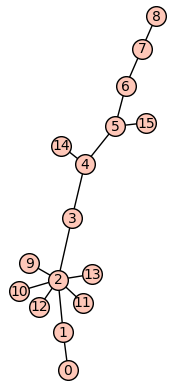

[  0   1   4  19  36  57  82 109 138  33  33  33  33  33  65  86]
[ 29   0   3  18  35  56  81 108 137  32  32  32  32  32  64  85]
[ 56  27   0  15  32  53  78 105 134  29  29  29  29  29  61  82]
[ 71  42  15   0  17  38  63  90 119  44  44  44  44  44  46  67]
[ 84  55  28  13   0  21  46  73 102  57  57  57  57  57  29  50]
[ 93  64  37  22   9   0  25  52  81  66  66  66  66  66  38  29]
[ 98  69  42  27  14   5   0  27  56  71  71  71  71  71  43  34]
[101  72  45  30  17   8   3   0  29  74  74  74  74  74  46  37]
[102  73  46  31  18   9   4   1   0  75  75  75  75  75  47  38]
[ 57  28   1  16  33  54  79 106 135   0  30  30  30  30  62  83]
[ 57  28   1  16  33  54  79 106 135  30   0  30  30  30  62  83]
[ 57  28   1  16  33  54  79 106 135  30  30   0  30  30  62  83]
[ 57  28   1  16  33  54  79 106 135  30  30  30   0  30  62  83]
[ 57  28   1  16  33  54  79 106 135  30  30  30  30   0  62  83]
[ 85  56  29  14   1  22  47  74 103  58  58  58  58  58   0  51]
[ 94  65  

In [16]:
C = A.copy()
C.delete_edge(1,9)
C.delete_edge(1,10)
C.delete_edge(1,11)
C.delete_edge(1,12)
C.delete_edge(1,13)
C.delete_edge(7,14)
C.delete_edge(7,15)
C.add_edge(2,9)
C.add_edge(2,10)
C.add_edge(2,11)
C.add_edge(2,12)
C.add_edge(2,13)
C.add_edge(4,14)
C.add_edge(5,15)
C.show()
hitting_time_matrix(C)

In [17]:
min_pessimal(C)

31

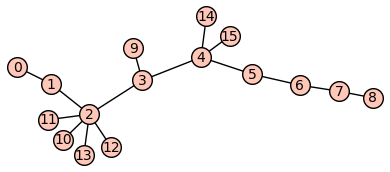

[  0   1   4  17  34  57  82 109 138  46  33  33  33  33  63  63]
[ 29   0   3  16  33  56  81 108 137  45  32  32  32  32  62  62]
[ 56  27   0  13  30  53  78 105 134  42  29  29  29  29  59  59]
[ 73  44  17   0  17  40  65  92 121  29  46  46  46  46  46  46]
[ 86  57  30  13   0  23  48  75 104  42  59  59  59  59  29  29]
[ 93  64  37  20   7   0  25  52  81  49  66  66  66  66  36  36]
[ 98  69  42  25  12   5   0  27  56  54  71  71  71  71  41  41]
[101  72  45  28  15   8   3   0  29  57  74  74  74  74  44  44]
[102  73  46  29  16   9   4   1   0  58  75  75  75  75  45  45]
[ 74  45  18   1  18  41  66  93 122   0  47  47  47  47  47  47]
[ 57  28   1  14  31  54  79 106 135  43   0  30  30  30  60  60]
[ 57  28   1  14  31  54  79 106 135  43  30   0  30  30  60  60]
[ 57  28   1  14  31  54  79 106 135  43  30  30   0  30  60  60]
[ 57  28   1  14  31  54  79 106 135  43  30  30  30   0  60  60]
[ 87  58  31  14   1  24  49  76 105  43  60  60  60  60   0  30]
[ 87  58  

In [18]:
D = C.copy()
D.delete_edge(5,15)
D.add_edge(4,15)
D.delete_edge(2,9)
D.add_edge(3,9)
D.show()
hitting_time_matrix(D)

In [416]:
min_pessimal(D)

29

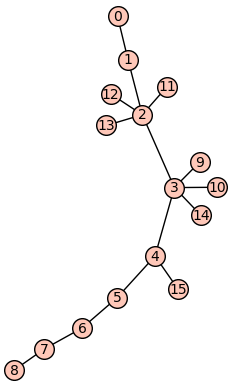

[  0   1   4  15  34  57  82 109 138  44  44  33  33  33  44  63]
[ 29   0   3  14  33  56  81 108 137  43  43  32  32  32  43  62]
[ 56  27   0  11  30  53  78 105 134  40  40  29  29  29  40  59]
[ 75  46  19   0  19  42  67  94 123  29  29  48  48  48  29  48]
[ 86  57  30  11   0  23  48  75 104  40  40  59  59  59  40  29]
[ 93  64  37  18   7   0  25  52  81  47  47  66  66  66  47  36]
[ 98  69  42  23  12   5   0  27  56  52  52  71  71  71  52  41]
[101  72  45  26  15   8   3   0  29  55  55  74  74  74  55  44]
[102  73  46  27  16   9   4   1   0  56  56  75  75  75  56  45]
[ 76  47  20   1  20  43  68  95 124   0  30  49  49  49  30  49]
[ 76  47  20   1  20  43  68  95 124  30   0  49  49  49  30  49]
[ 57  28   1  12  31  54  79 106 135  41  41   0  30  30  41  60]
[ 57  28   1  12  31  54  79 106 135  41  41  30   0  30  41  60]
[ 57  28   1  12  31  54  79 106 135  41  41  30  30   0  41  60]
[ 76  47  20   1  20  43  68  95 124  30  30  49  49  49   0  49]
[ 87  58  

In [19]:
E = D.copy()
E.delete_edge(4,14)
E.add_edge(3,14)
E.delete_edge(2,10)
E.add_edge(3,10)
E.show()
hitting_time_matrix(E)

In [20]:
min_pessimal(E)

27

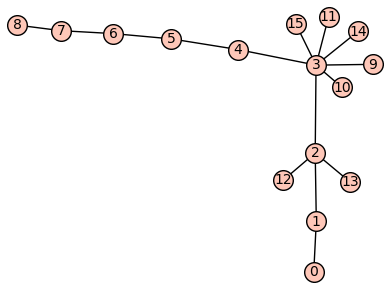

[  0   1   4  13  34  57  82 109 138  42  42  42  33  33  42  42]
[ 29   0   3  12  33  56  81 108 137  41  41  41  32  32  41  41]
[ 56  27   0   9  30  53  78 105 134  38  38  38  29  29  38  38]
[ 77  48  21   0  21  44  69  96 125  29  29  29  50  50  29  29]
[ 86  57  30   9   0  23  48  75 104  38  38  38  59  59  38  38]
[ 93  64  37  16   7   0  25  52  81  45  45  45  66  66  45  45]
[ 98  69  42  21  12   5   0  27  56  50  50  50  71  71  50  50]
[101  72  45  24  15   8   3   0  29  53  53  53  74  74  53  53]
[102  73  46  25  16   9   4   1   0  54  54  54  75  75  54  54]
[ 78  49  22   1  22  45  70  97 126   0  30  30  51  51  30  30]
[ 78  49  22   1  22  45  70  97 126  30   0  30  51  51  30  30]
[ 78  49  22   1  22  45  70  97 126  30  30   0  51  51  30  30]
[ 57  28   1  10  31  54  79 106 135  39  39  39   0  30  39  39]
[ 57  28   1  10  31  54  79 106 135  39  39  39  30   0  39  39]
[ 78  49  22   1  22  45  70  97 126  30  30  30  51  51   0  30]
[ 78  49  

In [21]:
F = E.copy()
F.delete_edge(4,15)
F.add_edge(3,15)
F.delete_edge(2,11)
F.add_edge(3,11)
F.show()
hitting_time_matrix(F)

In [22]:
min_pessimal(F)

25

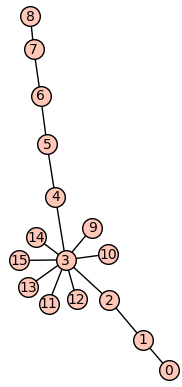

[  0   1   4   9  30  53  78 105 134  38  38  38  38  38  38  38]
[ 29   0   3   8  29  52  77 104 133  37  37  37  37  37  37  37]
[ 56  27   0   5  26  49  74 101 130  34  34  34  34  34  34  34]
[ 81  52  25   0  21  44  69  96 125  29  29  29  29  29  29  29]
[ 90  61  34   9   0  23  48  75 104  38  38  38  38  38  38  38]
[ 97  68  41  16   7   0  25  52  81  45  45  45  45  45  45  45]
[102  73  46  21  12   5   0  27  56  50  50  50  50  50  50  50]
[105  76  49  24  15   8   3   0  29  53  53  53  53  53  53  53]
[106  77  50  25  16   9   4   1   0  54  54  54  54  54  54  54]
[ 82  53  26   1  22  45  70  97 126   0  30  30  30  30  30  30]
[ 82  53  26   1  22  45  70  97 126  30   0  30  30  30  30  30]
[ 82  53  26   1  22  45  70  97 126  30  30   0  30  30  30  30]
[ 82  53  26   1  22  45  70  97 126  30  30  30   0  30  30  30]
[ 82  53  26   1  22  45  70  97 126  30  30  30  30   0  30  30]
[ 82  53  26   1  22  45  70  97 126  30  30  30  30  30   0  30]
[ 82  53  

In [23]:
G = F.copy()
G.delete_edge(2,12)
G.add_edge(3,12)
G.delete_edge(2,13)
G.add_edge(3,13)
G.show()
hitting_time_matrix(G)

In [24]:
min_pessimal(G)

25

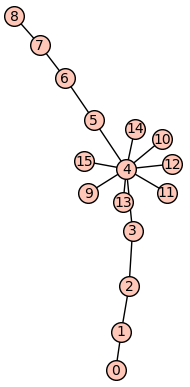

[  0   1   4   9  16  39  64  91 120  45  45  45  45  45  45  45]
[ 29   0   3   8  15  38  63  90 119  44  44  44  44  44  44  44]
[ 56  27   0   5  12  35  60  87 116  41  41  41  41  41  41  41]
[ 81  52  25   0   7  30  55  82 111  36  36  36  36  36  36  36]
[104  75  48  23   0  23  48  75 104  29  29  29  29  29  29  29]
[111  82  55  30   7   0  25  52  81  36  36  36  36  36  36  36]
[116  87  60  35  12   5   0  27  56  41  41  41  41  41  41  41]
[119  90  63  38  15   8   3   0  29  44  44  44  44  44  44  44]
[120  91  64  39  16   9   4   1   0  45  45  45  45  45  45  45]
[105  76  49  24   1  24  49  76 105   0  30  30  30  30  30  30]
[105  76  49  24   1  24  49  76 105  30   0  30  30  30  30  30]
[105  76  49  24   1  24  49  76 105  30  30   0  30  30  30  30]
[105  76  49  24   1  24  49  76 105  30  30  30   0  30  30  30]
[105  76  49  24   1  24  49  76 105  30  30  30  30   0  30  30]
[105  76  49  24   1  24  49  76 105  30  30  30  30  30   0  30]
[105  76  

In [25]:
H = G.copy()
H.delete_edge(3,9)
H.delete_edge(3,10)
H.delete_edge(3,11)
H.delete_edge(3,12)
H.delete_edge(3,13)
H.delete_edge(3,14)
H.delete_edge(3,15)
H.add_edge(4,9)
H.add_edge(4,10)
H.add_edge(4,11)
H.add_edge(4,12)
H.add_edge(4,13)
H.add_edge(4,14)
H.add_edge(4,15)
H.show()
hitting_time_matrix(H)

In [26]:
min_pessimal(H)

16

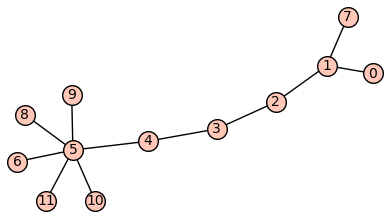

[ 0  1  6 13 22 33 54 22 54 54 54 54]
[21  0  5 12 21 32 53 21 53 53 53 53]
[38 17  0  7 16 27 48 38 48 48 48 48]
[53 32 15  0  9 20 41 53 41 41 41 41]
[66 45 28 13  0 11 32 66 32 32 32 32]
[77 56 39 24 11  0 21 77 21 21 21 21]
[78 57 40 25 12  1  0 78 22 22 22 22]
[22  1  6 13 22 33 54  0 54 54 54 54]
[78 57 40 25 12  1 22 78  0 22 22 22]
[78 57 40 25 12  1 22 78 22  0 22 22]
[78 57 40 25 12  1 22 78 22 22  0 22]
[78 57 40 25 12  1 22 78 22 22 22  0]

In [460]:
Z = Graph({0:[1],1:[2,7],2:[3],3:[4],4:[5],5:[6,8,9,10,11]})
Z.show()
hitting_time_matrix(Z)

In [ ]:
min(78,57,40,25,22,33,54,78,54,54,54,54)

In [461]:
min_pessimal(Z)

22

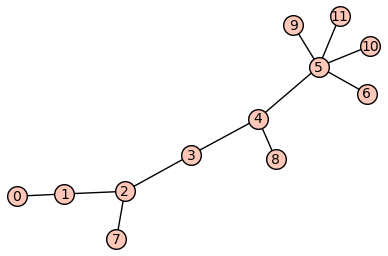

[ 0  1  4 11 20 33 54 25 41 54 54 54]
[21  0  3 10 19 32 53 24 40 53 53 53]
[40 19  0  7 16 29 50 21 37 50 50 50]
[55 34 15  0  9 22 43 36 30 43 43 43]
[68 47 28 13  0 13 34 49 21 34 34 34]
[77 56 37 22  9  0 21 58 30 21 21 21]
[78 57 38 23 10  1  0 59 31 22 22 22]
[41 20  1  8 17 30 51  0 38 51 51 51]
[69 48 29 14  1 14 35 50  0 35 35 35]
[78 57 38 23 10  1 22 59 31  0 22 22]
[78 57 38 23 10  1 22 59 31 22  0 22]
[78 57 38 23 10  1 22 59 31 22 22  0]

In [462]:
Y = Z.copy()
Y.delete_edge(1,7)
Y.add_edge(2,7)
Y.delete_edge(5,8)
Y.add_edge(4,8)
Y.show()
hitting_time_matrix(Y)

In [463]:
min_pessimal(Y)

20

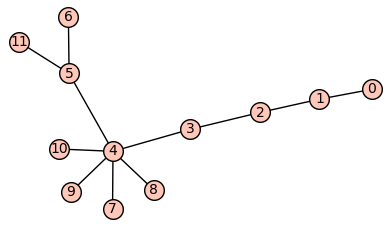

[ 0  1  4  9 16 33 54 37 37 37 37 54]
[21  0  3  8 15 32 53 36 36 36 36 53]
[40 19  0  5 12 29 50 33 33 33 33 50]
[57 36 17  0  7 24 45 28 28 28 28 45]
[72 51 32 15  0 17 38 21 21 21 21 38]
[77 56 37 20  5  0 21 26 26 26 26 21]
[78 57 38 21  6  1  0 27 27 27 27 22]
[73 52 33 16  1 18 39  0 22 22 22 39]
[73 52 33 16  1 18 39 22  0 22 22 39]
[73 52 33 16  1 18 39 22 22  0 22 39]
[73 52 33 16  1 18 39 22 22 22  0 39]
[78 57 38 21  6  1 22 27 27 27 27  0]

In [466]:
X = Y.copy()
X.delete_edge(2,7)
X.add_edge(4,7)
X.delete_edge(5,9)
X.delete_edge(5,10)
X.add_edge(4,9)
X.add_edge(4,10)
X.show()
hitting_time_matrix(X)

In [467]:
min_pessimal(X)

16

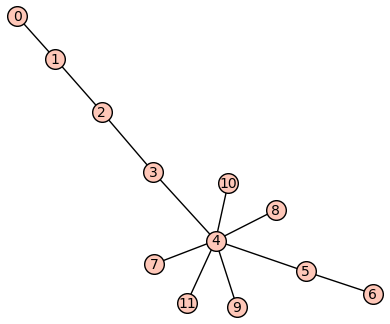

[ 0  1  4  9 16 35 56 37 37 37 37 37]
[21  0  3  8 15 34 55 36 36 36 36 36]
[40 19  0  5 12 31 52 33 33 33 33 33]
[57 36 17  0  7 26 47 28 28 28 28 28]
[72 51 32 15  0 19 40 21 21 21 21 21]
[75 54 35 18  3  0 21 24 24 24 24 24]
[76 55 36 19  4  1  0 25 25 25 25 25]
[73 52 33 16  1 20 41  0 22 22 22 22]
[73 52 33 16  1 20 41 22  0 22 22 22]
[73 52 33 16  1 20 41 22 22  0 22 22]
[73 52 33 16  1 20 41 22 22 22  0 22]
[73 52 33 16  1 20 41 22 22 22 22  0]

In [472]:
W = X.copy()
W.delete_edge(5,11)
W.add_edge(4,11)
W.show()
hitting_time_matrix(W)

In [473]:
min_pessimal(W)

16

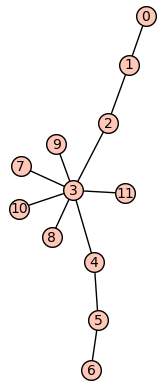

[ 0  1  4  9 26 45 66 30 30 30 30 30]
[21  0  3  8 25 44 65 29 29 29 29 29]
[40 19  0  5 22 41 62 26 26 26 26 26]
[57 36 17  0 17 36 57 21 21 21 21 21]
[62 41 22  5  0 19 40 26 26 26 26 26]
[65 44 25  8  3  0 21 29 29 29 29 29]
[66 45 26  9  4  1  0 30 30 30 30 30]
[58 37 18  1 18 37 58  0 22 22 22 22]
[58 37 18  1 18 37 58 22  0 22 22 22]
[58 37 18  1 18 37 58 22 22  0 22 22]
[58 37 18  1 18 37 58 22 22 22  0 22]
[58 37 18  1 18 37 58 22 22 22 22  0]

In [475]:
V = W.copy()
V.delete_edge(4,7)
V.delete_edge(4,8)
V.delete_edge(4,9)
V.delete_edge(4,10)
V.delete_edge(4,11)
V.add_edge(3,7)
V.add_edge(3,8)
V.add_edge(3,9)
V.add_edge(3,10)
V.add_edge(3,11)
V.show()
hitting_time_matrix(V)

In [476]:
min_pessimal(V)

9

## 6/15:

### Commute Time Matrices

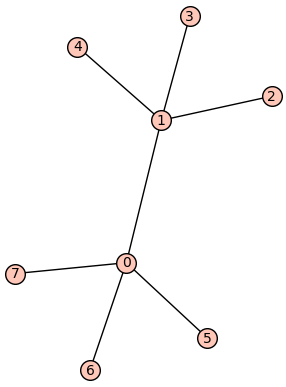

[ 0 14 28 28 28 14 14 14]
[14  0 14 14 14 28 28 28]
[28 14  0 28 28 42 42 42]
[28 14 28  0 28 42 42 42]
[28 14 28 28  0 42 42 42]
[14 28 42 42 42  0 28 28]
[14 28 42 42 42 28  0 28]
[14 28 42 42 42 28 28  0]
-----


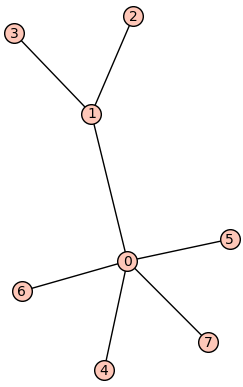

[ 0 14 28 28 14 14 14 14]
[14  0 14 14 28 28 28 28]
[28 14  0 28 42 42 42 42]
[28 14 28  0 42 42 42 42]
[14 28 42 42  0 28 28 28]
[14 28 42 42 28  0 28 28]
[14 28 42 42 28 28  0 28]
[14 28 42 42 28 28 28  0]
-----


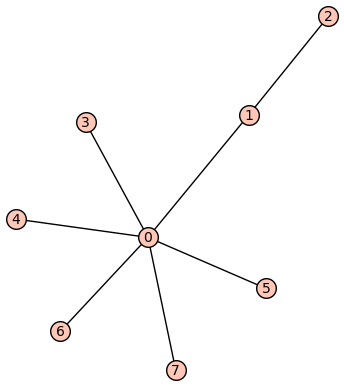

[ 0 14 28 14 14 14 14 14]
[14  0 14 28 28 28 28 28]
[28 14  0 42 42 42 42 42]
[14 28 42  0 28 28 28 28]
[14 28 42 28  0 28 28 28]
[14 28 42 28 28  0 28 28]
[14 28 42 28 28 28  0 28]
[14 28 42 28 28 28 28  0]
-----


In [26]:
for i in tree_generator(8,3):
    show(Graph(i))
    print(commute_time_matrix(i))
    print("-----")

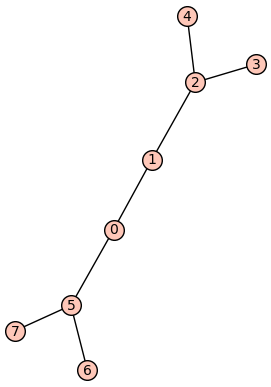

GhI?GG
[ 0 14 28 42 42 14 28 28]
[14  0 14 28 28 28 42 42]
[28 14  0 14 14 42 56 56]
[42 28 14  0 28 56 70 70]
[42 28 14 28  0 56 70 70]
[14 28 42 56 56  0 14 14]
[28 42 56 70 70 14  0 28]
[28 42 56 70 70 14 28  0]
-----


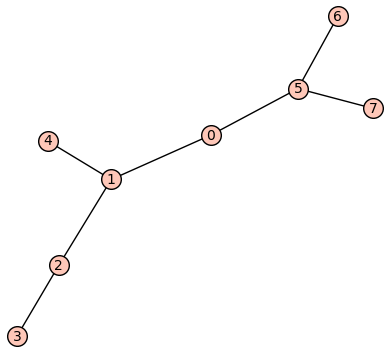

GhQ?GG
[ 0 14 28 42 28 14 28 28]
[14  0 14 28 14 28 42 42]
[28 14  0 14 28 42 56 56]
[42 28 14  0 42 56 70 70]
[28 14 28 42  0 42 56 56]
[14 28 42 56 42  0 14 14]
[28 42 56 70 56 14  0 28]
[28 42 56 70 56 14 28  0]
-----


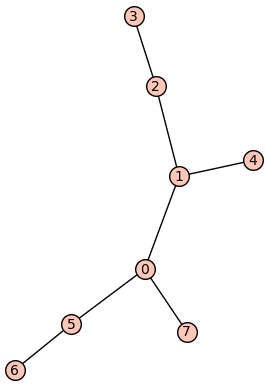

GhQ?K?
[ 0 14 28 42 28 14 28 14]
[14  0 14 28 14 28 42 28]
[28 14  0 14 28 42 56 42]
[42 28 14  0 42 56 70 56]
[28 14 28 42  0 42 56 42]
[14 28 42 56 42  0 14 28]
[28 42 56 70 56 14  0 42]
[14 28 42 56 42 28 42  0]
-----


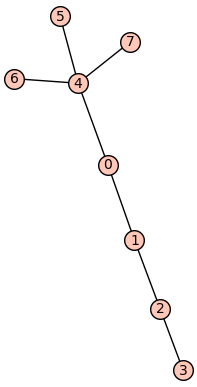

Gh_GOO
[ 0 14 28 42 14 28 28 28]
[14  0 14 28 28 42 42 42]
[28 14  0 14 42 56 56 56]
[42 28 14  0 56 70 70 70]
[14 28 42 56  0 14 14 14]
[28 42 56 70 14  0 28 28]
[28 42 56 70 14 28  0 28]
[28 42 56 70 14 28 28  0]
-----


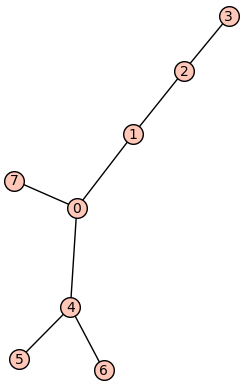

Gh_GS?
[ 0 14 28 42 14 28 28 14]
[14  0 14 28 28 42 42 28]
[28 14  0 14 42 56 56 42]
[42 28 14  0 56 70 70 56]
[14 28 42 56  0 14 14 28]
[28 42 56 70 14  0 28 42]
[28 42 56 70 14 28  0 42]
[14 28 42 56 28 42 42  0]
-----


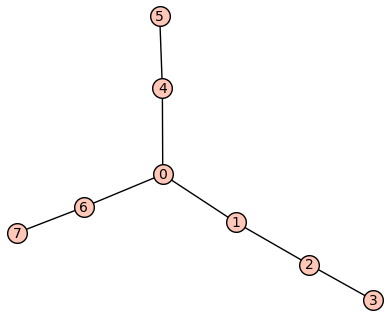

Gh_K?C
[ 0 14 28 42 14 28 14 28]
[14  0 14 28 28 42 28 42]
[28 14  0 14 42 56 42 56]
[42 28 14  0 56 70 56 70]
[14 28 42 56  0 14 28 42]
[28 42 56 70 14  0 42 56]
[14 28 42 56 28 42  0 14]
[28 42 56 70 42 56 14  0]
-----


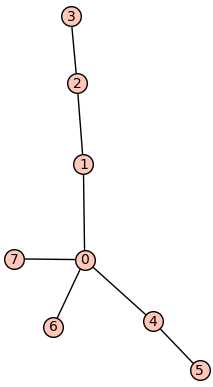

Gh_KC?
[ 0 14 28 42 14 28 14 14]
[14  0 14 28 28 42 28 28]
[28 14  0 14 42 56 42 42]
[42 28 14  0 56 70 56 56]
[14 28 42 56  0 14 28 28]
[28 42 56 70 14  0 42 42]
[14 28 42 56 28 42  0 28]
[14 28 42 56 28 42 28  0]
-----


In [99]:
for i in tree_generator(8,5):
    show(Graph(i))
    print(i)
    print(commute_time_matrix(i))
    print("-----")

In [110]:
A = Graph('Gh_GOO')
commute_time(A,7,0)
hitting_time_matrix(A)

[ 0  9 20 33  7 20 20 20]
[ 5  0 11 24 12 25 25 25]
[ 8  3  0 13 15 28 28 28]
[ 9  4  1  0 16 29 29 29]
[ 7 16 27 40  0 13 13 13]
[ 8 17 28 41  1  0 14 14]
[ 8 17 28 41  1 14  0 14]
[ 8 17 28 41  1 14 14  0]

In [111]:
B = Graph('Gh_GS?')
commute_time(B,6,0)
hitting_time_matrix(B)

[ 0  9 20 33  9 22 22 13]
[ 5  0 11 24 14 27 27 18]
[ 8  3  0 13 17 30 30 21]
[ 9  4  1  0 18 31 31 22]
[ 5 14 25 38  0 13 13 18]
[ 6 15 26 39  1  0 14 19]
[ 6 15 26 39  1 14  0 19]
[ 1 10 21 34 10 23 23  0]

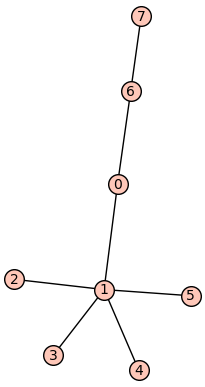

GiPC?C
[ 0 14 28 28 28 28 14 28]
[14  0 14 14 14 14 28 42]
[28 14  0 28 28 28 42 56]
[28 14 28  0 28 28 42 56]
[28 14 28 28  0 28 42 56]
[28 14 28 28 28  0 42 56]
[14 28 42 42 42 42  0 14]
[28 42 56 56 56 56 14  0]
-----


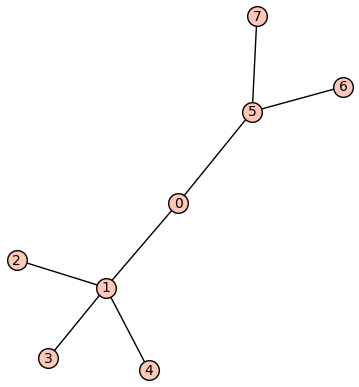

GiQ?GG
[ 0 14 28 28 28 14 28 28]
[14  0 14 14 14 28 42 42]
[28 14  0 28 28 42 56 56]
[28 14 28  0 28 42 56 56]
[28 14 28 28  0 42 56 56]
[14 28 42 42 42  0 14 14]
[28 42 56 56 56 14  0 28]
[28 42 56 56 56 14 28  0]
-----


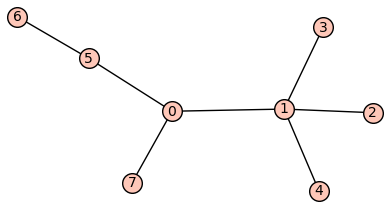

GiQ?K?
[ 0 14 28 28 28 14 28 14]
[14  0 14 14 14 28 42 28]
[28 14  0 28 28 42 56 42]
[28 14 28  0 28 42 56 42]
[28 14 28 28  0 42 56 42]
[14 28 42 42 42  0 14 28]
[28 42 56 56 56 14  0 42]
[14 28 42 42 42 28 42  0]
-----


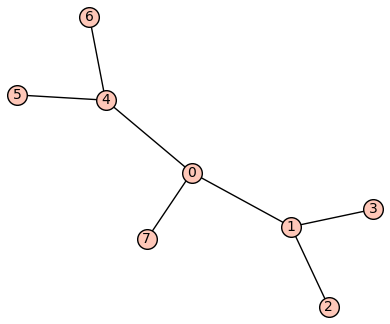

Gi_GS?
[ 0 14 28 28 14 28 28 14]
[14  0 14 14 28 42 42 28]
[28 14  0 28 42 56 56 42]
[28 14 28  0 42 56 56 42]
[14 28 42 42  0 14 14 28]
[28 42 56 56 14  0 28 42]
[28 42 56 56 14 28  0 42]
[14 28 42 42 28 42 42  0]
-----


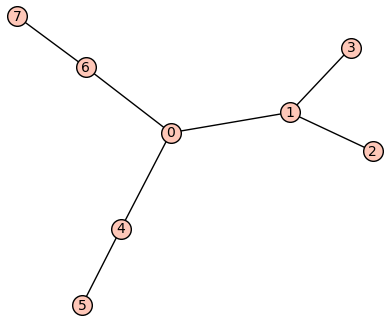

Gi_K?C
[ 0 14 28 28 14 28 14 28]
[14  0 14 14 28 42 28 42]
[28 14  0 28 42 56 42 56]
[28 14 28  0 42 56 42 56]
[14 28 42 42  0 14 28 42]
[28 42 56 56 14  0 42 56]
[14 28 42 42 28 42  0 14]
[28 42 56 56 42 56 14  0]
-----


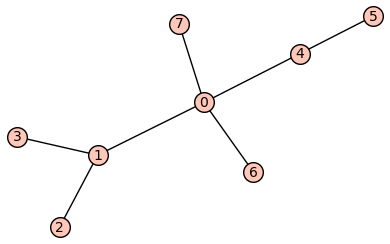

Gi_KC?
[ 0 14 28 28 14 28 14 14]
[14  0 14 14 28 42 28 28]
[28 14  0 28 42 56 42 42]
[28 14 28  0 42 56 42 42]
[14 28 42 42  0 14 28 28]
[28 42 56 56 14  0 42 42]
[14 28 42 42 28 42  0 28]
[14 28 42 42 28 42 28  0]
-----


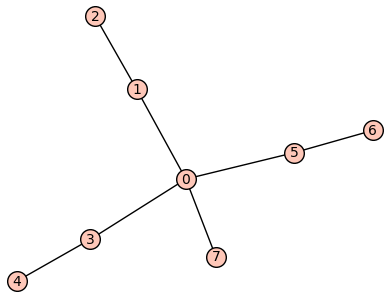

GkE?K?
[ 0 14 28 14 28 14 28 14]
[14  0 14 28 42 28 42 28]
[28 14  0 42 56 42 56 42]
[14 28 42  0 14 28 42 28]
[28 42 56 14  0 42 56 42]
[14 28 42 28 42  0 14 28]
[28 42 56 42 56 14  0 42]
[14 28 42 28 42 28 42  0]
-----


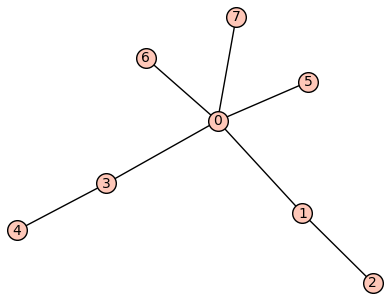

GkECC?
[ 0 14 28 14 28 14 14 14]
[14  0 14 28 42 28 28 28]
[28 14  0 42 56 42 42 42]
[14 28 42  0 14 28 28 28]
[28 42 56 14  0 42 42 42]
[14 28 42 28 42  0 28 28]
[14 28 42 28 42 28  0 28]
[14 28 42 28 42 28 28  0]
-----


In [31]:
for i in tree_generator(8,4):
    show(Graph(i))
    print(i)
    print(commute_time_matrix(i))
    print("-----")

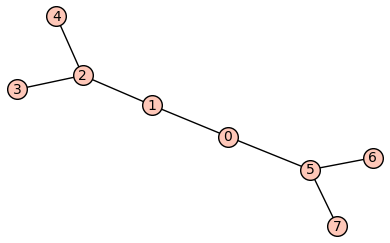

GhI?GG
[ 0 14 28 42 42 14 28 28]
[14  0 14 28 28 28 42 42]
[28 14  0 14 14 42 56 56]
[42 28 14  0 28 56 70 70]
[42 28 14 28  0 56 70 70]
[14 28 42 56 56  0 14 14]
[28 42 56 70 70 14  0 28]
[28 42 56 70 70 14 28  0]
-----


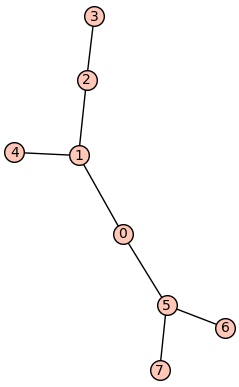

GhQ?GG
[ 0 14 28 42 28 14 28 28]
[14  0 14 28 14 28 42 42]
[28 14  0 14 28 42 56 56]
[42 28 14  0 42 56 70 70]
[28 14 28 42  0 42 56 56]
[14 28 42 56 42  0 14 14]
[28 42 56 70 56 14  0 28]
[28 42 56 70 56 14 28  0]
-----


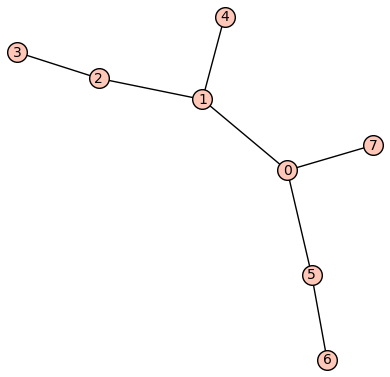

GhQ?K?
[ 0 14 28 42 28 14 28 14]
[14  0 14 28 14 28 42 28]
[28 14  0 14 28 42 56 42]
[42 28 14  0 42 56 70 56]
[28 14 28 42  0 42 56 42]
[14 28 42 56 42  0 14 28]
[28 42 56 70 56 14  0 42]
[14 28 42 56 42 28 42  0]
-----


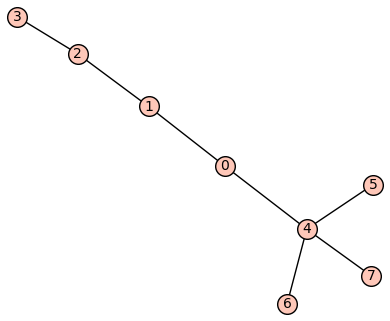

Gh_GOO
[ 0 14 28 42 14 28 28 28]
[14  0 14 28 28 42 42 42]
[28 14  0 14 42 56 56 56]
[42 28 14  0 56 70 70 70]
[14 28 42 56  0 14 14 14]
[28 42 56 70 14  0 28 28]
[28 42 56 70 14 28  0 28]
[28 42 56 70 14 28 28  0]
-----


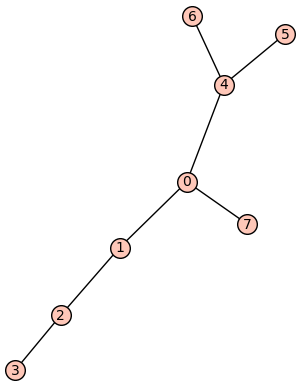

Gh_GS?
[ 0 14 28 42 14 28 28 14]
[14  0 14 28 28 42 42 28]
[28 14  0 14 42 56 56 42]
[42 28 14  0 56 70 70 56]
[14 28 42 56  0 14 14 28]
[28 42 56 70 14  0 28 42]
[28 42 56 70 14 28  0 42]
[14 28 42 56 28 42 42  0]
-----


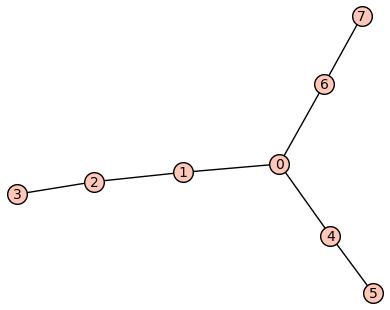

Gh_K?C
[ 0 14 28 42 14 28 14 28]
[14  0 14 28 28 42 28 42]
[28 14  0 14 42 56 42 56]
[42 28 14  0 56 70 56 70]
[14 28 42 56  0 14 28 42]
[28 42 56 70 14  0 42 56]
[14 28 42 56 28 42  0 14]
[28 42 56 70 42 56 14  0]
-----


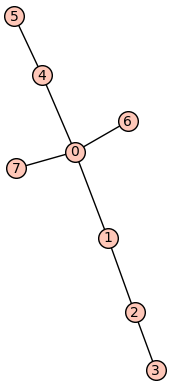

Gh_KC?
[ 0 14 28 42 14 28 14 14]
[14  0 14 28 28 42 28 28]
[28 14  0 14 42 56 42 42]
[42 28 14  0 56 70 56 56]
[14 28 42 56  0 14 28 28]
[28 42 56 70 14  0 42 42]
[14 28 42 56 28 42  0 28]
[14 28 42 56 28 42 28  0]
-----


In [98]:
for i in tree_generator(8,5):
    show(Graph(i))
    print(i)
    print(commute_time_matrix(i))
    print("-----")